> ## Lead Scoring Case Study Final
>Submitted By       : ***Srinivasan. G, Naveed.J, Denny.J and Kumar.A***<br>
>Date of Submission : ***03-March-2019***<br>
>Batch              : ***September - 2018***<br>

### Problem Statement

>    An Education company facilitates  online courses to industry professionals market
their courses on several online website, google etc., expects the people to join their courses by filling up the online form. So, based on the leads such email,phone number,online websites, TV advertisements, past referrals etc., the company communicate with the potential customers and encourge them to join their courses.<br>

> Through this process some of the leads gets converted to potential customers.The current typical conversion rate is 30%.<br>

> Since the conversion rate is very low, the company aims to identify 'Hot Leads' and potentially by marketing through this leads to increase the rate of conversion.The company aim to build a model wherein we assign a 'lead score' to each of the leads such that customer with higher lead scores have higher probability of joinig the course.<br>

> The target ballpark **`conversion rate or new lead score expected or set by the company   is around 80%`**.

### Import Libraries<br>

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scikit learn libraries.
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# PCA Analysis Libraries.
from sklearn.decomposition import PCA

#Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Setup necessary Jupyter notebook options<br>

In [2]:
# Set up jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# If necessary use the set options of the display . If not required. disable 
pd.set_option('display.max_columns', 60)
#pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.max_rows = 999

#Change the float format for display in notebook
pd.options.display.float_format = '{:,.2f}'.format

## Step 1: Reading and Understanding the Data

In [3]:
## Read the Uber Request Data.csv file 
leads = pd.read_csv("Leads.csv")

In [4]:
## leads_data.shape
leads.shape
leads.info()

(9240, 37)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


#### **Observations**<br>
> - There are `9240 rows` and `37 columns` in the original data frame cars.<br>
> - There are `7 Numerical Variables and 30 categorical Variables`.<br>

> - **30 - Categorical Independent Variables** - 
  - `Prospect ID`,`Lead Origin`,`Lead Source`,`Do Not Email,Do Not Call`,
  - `Last Activity`,`Country`,`Specialization`,`How did you hear about X Education`,
  - `What is your current occupation`,
  - `What matters most to you in choosing a course`,
  - `Search`,`Magazine`,`Newspaper Article`,`X Education Forums`,`Newspaper`,
  - `Digital Advertisement`,`Through Recommendations`,
  - `Receive More Updates About Our Courses`,`Tags`,`Lead Quality`,
  - `Update me on Supply Chain Content`,
  - `Get updates on DM Content`,`Lead Profile`,
  - `City`,`Asymmetrique Activity Index`,
  - `Asymmetrique Profile Index`,
  - `I agree to pay the amount through cheque`,
  - `A free copy of Mastering The Interview`,
  - `Last Notable Activity`<br>
  
> - **7 - Numeric Independent variables** 
  - `Lead Number`,`TotalVisits`,`Total Time Spent on Website`, 
  - `Page Views Per Visit`,
  - `Asymmetrique Activity Score`, `Asymmetrique Profile Score`<br>
  
> - **The dependent Numeric (response/target Variable)** 
  -   `Converted`<br>

#### **Inferences** <br>
> - Lots of categorical variables and hence need to verify significance of those variables on the dependent variable.
> - Less Significant and single value columns can be dropped. They are ;
    - `Lead Number`,`Magazine`, `Receive More Updates About Our Courses`,
    - `Update me on Supply Chain Content`,`Get updates on DM Content`,
    - `I agree to pay the amount through cheque`
> - Many columns have null value and hence needs clean up.

### Step 1.1 : Dropping insignificant or not useful columns

In [6]:
# Insignificant or not useful columns.
colNames = ['Magazine',
            'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content',
            'Get updates on DM Content',
            'I agree to pay the amount through cheque'
           ]
leads_data = leads.drop(columns=colNames,axis=1)

In [7]:
leads_data.shape

(9240, 32)

## Step 2: Data Cleaning and Preparation

### Step 2.1: Rename Long Name Columns to shorter names

In [8]:
col_rename = {'Prospect ID'                                  : 'Prospect_ID', 
              'Lead Number'                                  : 'Lead_Number', 
              'Lead Origin'                                  : 'Lead_Origin',
              'Lead Source'                                  : 'Lead_Source',
              'Do Not Email'                                 : 'Do_Not_Email',
              'Do Not Call'                                  : 'Do_Not_Call',
              'Total Time Spent on Website'                  : 'TotalWebTime',
              'Page Views Per Visit'                         : 'PagesPerView',
              'Last Activity'                                : 'Last_Activity',
              'How did you hear about X Education'           : 'X_Edu_Source',
              'What is your current occupation'              : 'Current_Occupation',
              'What matters most to you in choosing a course': 'Course_Emphasis',
              'Newspaper Article'                            : 'Newspaper_Article',
              'X Education Forums'                           : 'X_Edu_Forums',
              'Digital Advertisement'                        : 'Digital_Adv',
              'Through Recommendations'                      : 'Thru_Recom',
              'Lead Quality'                                 : 'Lead_Quality',
              'Lead Profile'                                 : 'Lead_Profile',
              'Asymmetrique Activity Index'                  : 'Asym_Activity_Index',
              'Asymmetrique Profile Index'                   : 'Asym_Profile_Index',
              'Asymmetrique Activity Score'                  : 'Asym_Activity_Score',
              'Asymmetrique Profile Score'                   : 'Asym_Profile_Score',
              'A free copy of Mastering The Interview'       : 'Master_Interview_Copy',
              'Last Notable Activity'                        : 'Last_Notable_Activity'
             }
# Rename the columns
leads_data.rename(columns=col_rename,inplace=True)

In [9]:
leads_data.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'TotalWebTime', 'PagesPerView', 'Last_Activity', 'Country',
       'Specialization', 'X_Edu_Source', 'Current_Occupation',
       'Course_Emphasis', 'Search', 'Newspaper_Article', 'X_Edu_Forums',
       'Newspaper', 'Digital_Adv', 'Thru_Recom', 'Tags', 'Lead_Quality',
       'Lead_Profile', 'City', 'Asym_Activity_Index', 'Asym_Profile_Index',
       'Asym_Activity_Score', 'Asym_Profile_Score', 'Master_Interview_Copy',
       'Last_Notable_Activity'],
      dtype='object')

In [10]:
### Step 2.1: Convert all the categorical variables to lower case.
leads_data = leads_data.applymap(lambda s: s.lower() if type(s) == str else s)

In [11]:
# Convert Leader Number from int to str object.
leads_data['Lead_Number'] = leads_data['Lead_Number'].apply(str)

In [12]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
Prospect_ID              9240 non-null object
Lead_Number              9240 non-null object
Lead_Origin              9240 non-null object
Lead_Source              9204 non-null object
Do_Not_Email             9240 non-null object
Do_Not_Call              9240 non-null object
Converted                9240 non-null int64
TotalVisits              9103 non-null float64
TotalWebTime             9240 non-null int64
PagesPerView             9103 non-null float64
Last_Activity            9137 non-null object
Country                  6779 non-null object
Specialization           7802 non-null object
X_Edu_Source             7033 non-null object
Current_Occupation       6550 non-null object
Course_Emphasis          6531 non-null object
Search                   9240 non-null object
Newspaper_Article        9240 non-null object
X_Edu_Forums             9240 non-null object
Newspaper          

In [13]:
leads_data.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,TotalWebTime,PagesPerView,Last_Activity,Country,Specialization,X_Edu_Source,Current_Occupation,Course_Emphasis,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Tags,Lead_Quality,Lead_Profile,City,Asym_Activity_Index,Asym_Profile_Index,Asym_Activity_Score,Asym_Profile_Score,Master_Interview_Copy,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.00,0,0.00,page visited on website,NaN,select,select,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,low in relevance,select,select,02.medium,02.medium,15.00,15.00,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.00,674,2.50,email opened,india,select,select,unemployed,better career prospects,no,no,no,no,no,no,ringing,NaN,select,select,02.medium,02.medium,15.00,15.00,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.00,1532,2.00,email opened,india,business administration,select,student,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.00,20.00,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.00,305,1.00,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,ringing,not sure,select,mumbai,02.medium,01.high,13.00,17.00,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.00,1428,1.00,converted to lead,india,select,other,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,select,mumbai,02.medium,01.high,15.00,18.00,no,modified


### Step 2.2: Verify the rows where all columns have null values  

In [14]:
leads_data.isnull().all(axis=0).sum()

0

### Step 2.3: Verify the rows where all columns are duplicated 

In [15]:
leads_data.duplicated().sum()

0

In [16]:
leads_data.shape

(9240, 32)

### Step 2.4: Verify the percentage Null columns

In [17]:
leads_data.isnull().sum()


Prospect_ID                 0
Lead_Number                 0
Lead_Origin                 0
Lead_Source                36
Do_Not_Email                0
Do_Not_Call                 0
Converted                   0
TotalVisits               137
TotalWebTime                0
PagesPerView              137
Last_Activity             103
Country                  2461
Specialization           1438
X_Edu_Source             2207
Current_Occupation       2690
Course_Emphasis          2709
Search                      0
Newspaper_Article           0
X_Edu_Forums                0
Newspaper                   0
Digital_Adv                 0
Thru_Recom                  0
Tags                     3353
Lead_Quality             4767
Lead_Profile             2709
City                     1420
Asym_Activity_Index      4218
Asym_Profile_Index       4218
Asym_Activity_Score      4218
Asym_Profile_Score       4218
Master_Interview_Copy       0
Last_Notable_Activity       0
dtype: int64

In [18]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID              0.00
Lead_Number              0.00
Lead_Origin              0.00
Lead_Source              0.39
Do_Not_Email             0.00
Do_Not_Call              0.00
Converted                0.00
TotalVisits              1.48
TotalWebTime             0.00
PagesPerView             1.48
Last_Activity            1.11
Country                 26.63
Specialization          15.56
X_Edu_Source            23.89
Current_Occupation      29.11
Course_Emphasis         29.32
Search                   0.00
Newspaper_Article        0.00
X_Edu_Forums             0.00
Newspaper                0.00
Digital_Adv              0.00
Thru_Recom               0.00
Tags                    36.29
Lead_Quality            51.59
Lead_Profile            29.32
City                    15.37
Asym_Activity_Index     45.65
Asym_Profile_Index      45.65
Asym_Activity_Score     45.65
Asym_Profile_Score      45.65
Master_Interview_Copy    0.00
Last_Notable_Activity    0.00
dtype: float64

#### **Observations**<br>
> - There are 17 columns have null values. They are ;
  - `Lead_Source`,`TotalVisits`,`PagesPerView`,`Last_Activity`,`Country`,`Specialization`,`X_Edu_Source`,
  - `Current_Occupation`,`Course_Emphasis`,`Tags`,`Lead_Quality`,`Lead_Profile`,`City`,`Asym_Activity_Index`,
  - `Asym_Profile Index`,`Asym_Activity_Score`,`Asym_Profile_Score`<br>
  
> - We will drop columns with high null values ( ~ equal or greater than 30% ) like `Tags`,`Leads_quality`, and `Leads_Profile`, as they will not provide any meaningful insight. Also, if we impute such as large amount of null values it will create a bias. So, better we drop the columns. Itris as follws ;
   - Leads_Quality - 4767 nulls  
   - Tags - 3353 nulls and insignificant column in analysis
   - Leads_Profile - 2709 nulls and insignifiant columns

### Step 2.5: Drop columns which is having high number of nulls and insignificant for analysis.

In [19]:
leads_data.Lead_Quality.isnull().sum()

leads_data.Tags.isnull().sum()
leads_data.Lead_Profile.isnull().sum()

leads_data.Lead_Quality.value_counts()
leads_data.Tags.value_counts()
leads_data.Lead_Profile.value_counts()

4767

3353

2709

might be             1560
not sure             1092
high in relevance     637
worst                 601
low in relevance      583
Name: Lead_Quality, dtype: int64

will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with eins                                     12
lost to others

select                         4146
potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead_Profile, dtype: int64

In [20]:
dcols = ['Tags','Lead_Quality','Lead_Profile']
leads_data = leads_data.drop(columns=dcols,axis=1)

In [21]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID              0.00
Lead_Number              0.00
Lead_Origin              0.00
Lead_Source              0.39
Do_Not_Email             0.00
Do_Not_Call              0.00
Converted                0.00
TotalVisits              1.48
TotalWebTime             0.00
PagesPerView             1.48
Last_Activity            1.11
Country                 26.63
Specialization          15.56
X_Edu_Source            23.89
Current_Occupation      29.11
Course_Emphasis         29.32
Search                   0.00
Newspaper_Article        0.00
X_Edu_Forums             0.00
Newspaper                0.00
Digital_Adv              0.00
Thru_Recom               0.00
City                    15.37
Asym_Activity_Index     45.65
Asym_Profile_Index      45.65
Asym_Activity_Score     45.65
Asym_Profile_Score      45.65
Master_Interview_Copy    0.00
Last_Notable_Activity    0.00
dtype: float64

### Step 2.6: Imputation of Null values for Categorical Columns

#### 2.6.1 - Columns Lead Source, Last Activity, Country 

In [22]:
# Verify columns for is null and replace the null values with 'unknown'
cols = ['Lead_Source','Last_Activity','Country']

#
print (leads_data[cols].isnull().sum())

Lead_Source        36
Last_Activity     103
Country          2461
dtype: int64


In [23]:
# Replace the column values with unknown.
for col in cols:
    leads_data.loc[(leads_data[col].isnull()),col] = 'unknown'

In [24]:
# verify the value counts.
for col in cols:
    leads_data[col].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
unknown                36
bing                    6
click2call              4
press_release           2
live chat               2
social media            2
blog                    1
youtubechannel          1
pay per click ads       1
welearnblog_home        1
nc_edm                  1
welearn                 1
testone                 1
Name: Lead_Source, dtype: int64

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unknown                          103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last_Activity, dtype: int64

india                   6492
unknown                 2466
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
france                     6
oman                       6
germany                    4
south africa               4
canada                     4
nigeria                    4
kuwait                     4
sweden                     3
asia/pacific region        2
uganda                     2
china                      2
ghana                      2
bangladesh                 2
belgium                    2
netherlands                2
philippines                2
italy                      2
denmark                    1
liberia                    1
tanzania                   1
russia                     1
vietnam                    1
malaysia                   1
switzerland   

In [25]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID              0.00
Lead_Number              0.00
Lead_Origin              0.00
Lead_Source              0.00
Do_Not_Email             0.00
Do_Not_Call              0.00
Converted                0.00
TotalVisits              1.48
TotalWebTime             0.00
PagesPerView             1.48
Last_Activity            0.00
Country                  0.00
Specialization          15.56
X_Edu_Source            23.89
Current_Occupation      29.11
Course_Emphasis         29.32
Search                   0.00
Newspaper_Article        0.00
X_Edu_Forums             0.00
Newspaper                0.00
Digital_Adv              0.00
Thru_Recom               0.00
City                    15.37
Asym_Activity_Index     45.65
Asym_Profile_Index      45.65
Asym_Activity_Score     45.65
Asym_Profile_Score      45.65
Master_Interview_Copy    0.00
Last_Notable_Activity    0.00
dtype: float64

#### **Observations**<br>
> The Null values in the columns below has been replaced with value 'unknown'
  - `Lead_Source`
  - `Last_Activity`
  - `Country`

#### 2.6.2 - For Columns 'Specialization',  'X_Edu_Source', 'Current_Occupation', and  'Course_Emphasis'

In [26]:
# Verify categorical columns which have multiple columns but with null values
# which can be classified as others.

print("Number of null values in Specialization: ",
                leads_data['Specialization'].isnull().sum())

Number of null values in Specialization:  1438


In [27]:
# Check the value counts
leads_data['Specialization'].value_counts()

select                               1942
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [28]:
# Replace the blank and select column value with others.
leads_data.loc[(leads_data['Specialization'].isnull()),'Specialization'] = 'unknown'
leads_data.loc[(leads_data['Specialization'] == 'select'),'Specialization'] = 'unknown'

# check the value counts for specialization of imputing null values.
leads_data['Specialization'].value_counts()

unknown                              3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [29]:
#Imputing for `How did you hear about X Education Source`
#
# Verify the Null values in the column `how did you hear about X Education column`

print("Number of Nulls in X_Edu_Source: ",
         leads_data['X_Edu_Source'].isnull().sum())

Number of Nulls in X_Edu_Source:  2207


In [30]:
# check the value counts for How did you hear about X_Edu_Source
      
leads_data['X_Edu_Source'].value_counts()

select                   5043
online search             808
word of mouth             348
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: X_Edu_Source, dtype: int64

In [31]:
# Replace the blank,select to 'unknown' and other values to 'others'.
#
leads_data.loc[(leads_data['X_Edu_Source'].isnull()),'X_Edu_Source'] = 'unknown'
leads_data.loc[(leads_data['X_Edu_Source'] == 'select'),'X_Edu_Source'] = 'unknown'
leads_data.loc[(leads_data['X_Edu_Source'] == 'other'), 'X_Edu_Source'] = 'others'

# check the value counts for specialization
leads_data['X_Edu_Source'].value_counts()

unknown                  7250
online search             808
word of mouth             348
student of someschool     310
others                    186
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: X_Edu_Source, dtype: int64

In [32]:
#Imputing for column 'Current_Occupation'
#
#
# Verify the Null values in the column 'What is your current occupation'
print("Number of Nulls in 'Current_Occupation': ",
      leads_data['Current_Occupation'].isnull().sum())

Number of Nulls in 'Current_Occupation':  2690


In [33]:
# check the value counts for specialization
leads_data['Current_Occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: Current_Occupation, dtype: int64

In [34]:
# Replace the blank and other values values with value 'others'.
#
leads_data.loc[(leads_data['Current_Occupation'].isnull()),'Current_Occupation'] = 'unknown'

leads_data.loc[(leads_data['Current_Occupation'] == 'other'),'Current_Occupation'] = 'others'

# check the value counts for specialization post imputation.
leads_data['Current_Occupation'].value_counts()

unemployed              5600
unknown                 2690
working professional     706
student                  210
others                    16
housewife                 10
businessman                8
Name: Current_Occupation, dtype: int64

In [35]:
#Imputing for column Course_Emphasis
#
# Verify the Null values in the column Course_Emphasis
print("Number of Nulls in Course_Emphasis: ",
         leads_data['Course_Emphasis'].isnull().sum())

Number of Nulls in Course_Emphasis:  2709


In [36]:
# check the value counts for Course_Emphasis
leads_data['Course_Emphasis'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: Course_Emphasis, dtype: int64

In [37]:
# Replace the blank,select and other values values with value 'others'.
#
leads_data.loc[(leads_data['Course_Emphasis'].isnull()),'Course_Emphasis'] = 'Not Decided'
#
leads_data.loc[(leads_data['Course_Emphasis'] == 'other'),'Course_Emphasis'] = 'others'

# check the value counts for course_emphasis post imputation.

leads_data['Course_Emphasis'].value_counts()

better career prospects      6528
Not Decided                  2709
flexibility & convenience       2
others                          1
Name: Course_Emphasis, dtype: int64

In [38]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID              0.00
Lead_Number              0.00
Lead_Origin              0.00
Lead_Source              0.00
Do_Not_Email             0.00
Do_Not_Call              0.00
Converted                0.00
TotalVisits              1.48
TotalWebTime             0.00
PagesPerView             1.48
Last_Activity            0.00
Country                  0.00
Specialization           0.00
X_Edu_Source             0.00
Current_Occupation       0.00
Course_Emphasis          0.00
Search                   0.00
Newspaper_Article        0.00
X_Edu_Forums             0.00
Newspaper                0.00
Digital_Adv              0.00
Thru_Recom               0.00
City                    15.37
Asym_Activity_Index     45.65
Asym_Profile_Index      45.65
Asym_Activity_Score     45.65
Asym_Profile_Score      45.65
Master_Interview_Copy    0.00
Last_Notable_Activity    0.00
dtype: float64

#### **Observations**<br>
> The has imputation for the columns as listed below ;
  - `Specialization` - NaN and select values are replaced with `unknown` <br>
  - `X_Edu_Source` - NaN and select values replaced with `unknown` and `other` value changed to `others` <br>
  - `Current_Occupation` - NaN and select values are replaced with `unknown`<br> 
  - `course_emphasis` - NaN values are replaced with `not decided`<br>

#### 2.6.3 - Column City

In [39]:
#Imputing for column 'City'
#
#
leads_data['City'].isnull().sum()

1420

In [40]:
leads_data['City'].value_counts()

mumbai                         3222
select                         2249
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [41]:
#1. Impute Blanks  and Select values to 'unknown'.

leads_data.loc[(leads_data['City'].isnull()),'City'] = 'unknown'
leads_data.loc[(leads_data['City'] == 'select'),'City'] = 'unknown'

#2. Impute Thane & outskirts to Mumbai
leads_data.loc[(leads_data['City'] == 'thane & outskirts'),'City'] = 'mumbai'

leads_data['City'].value_counts()

mumbai                         3974
unknown                        3669
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [42]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID              0.00
Lead_Number              0.00
Lead_Origin              0.00
Lead_Source              0.00
Do_Not_Email             0.00
Do_Not_Call              0.00
Converted                0.00
TotalVisits              1.48
TotalWebTime             0.00
PagesPerView             1.48
Last_Activity            0.00
Country                  0.00
Specialization           0.00
X_Edu_Source             0.00
Current_Occupation       0.00
Course_Emphasis          0.00
Search                   0.00
Newspaper_Article        0.00
X_Edu_Forums             0.00
Newspaper                0.00
Digital_Adv              0.00
Thru_Recom               0.00
City                     0.00
Asym_Activity_Index     45.65
Asym_Profile_Index      45.65
Asym_Activity_Score     45.65
Asym_Profile_Score      45.65
Master_Interview_Copy    0.00
Last_Notable_Activity    0.00
dtype: float64

#### **Observations**<br>
> - The null values for the columns handled as below ;
  - `City`         - Replaced null values, select, to 'unknown' and `Thane & outskirts` to mumbai

#### 2.6.4 -  Columns Asym_Activity_Index

In [43]:
# Impute A'Asym_Activity_Index' null values.
leads_data.Asym_Activity_Index.isnull().sum()

4218

In [44]:
#impute values for column 'Asym_Activity_Index'      .

# Check the value counts
leads_data['Asym_Activity_Index'].value_counts()

02.medium    3839
01.high       821
03.low        362
Name: Asym_Activity_Index, dtype: int64

In [45]:
# impute other columns 1,2 and 3.
leads_data['Asym_Activity_Index'] = leads_data['Asym_Activity_Index']\
                        .apply({'01.high': '1', '02.medium': '2', '03.low': '3'}.get)

# Impute null values to 0
leads_data.loc[(leads_data['Asym_Activity_Index'].isnull()),'Asym_Activity_Index'] = 0

# Check the value counts.               
leads_data['Asym_Activity_Index'].value_counts()

0    4218
2    3839
1     821
3     362
Name: Asym_Activity_Index, dtype: int64

#### 2.6.5 -  Columns Asym_Profile_Index

In [46]:
#impute values for column 'Asym_Profile_Index'       .

leads_data['Asym_Profile_Index'].isnull().sum()
# Check the original value counts.
leads_data['Asym_Profile_Index'].value_counts()

4218

02.medium    2788
01.high      2203
03.low         31
Name: Asym_Profile_Index, dtype: int64

In [47]:
# impute other columns 1,2 and 3.
leads_data['Asym_Profile_Index'] = leads_data['Asym_Profile_Index']\
                        .apply({'01.high': '1', '02.medium': '2', '03.low': '3'}.get)

# Impute null values to 0
leads_data.loc[(leads_data['Asym_Profile_Index'].isnull()),'Asym_Profile_Index'] = 0

# Check the value counts.               
leads_data['Asym_Profile_Index'].value_counts()

0    4218
2    2788
1    2203
3      31
Name: Asym_Profile_Index, dtype: int64

In [48]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID              0.00
Lead_Number              0.00
Lead_Origin              0.00
Lead_Source              0.00
Do_Not_Email             0.00
Do_Not_Call              0.00
Converted                0.00
TotalVisits              1.48
TotalWebTime             0.00
PagesPerView             1.48
Last_Activity            0.00
Country                  0.00
Specialization           0.00
X_Edu_Source             0.00
Current_Occupation       0.00
Course_Emphasis          0.00
Search                   0.00
Newspaper_Article        0.00
X_Edu_Forums             0.00
Newspaper                0.00
Digital_Adv              0.00
Thru_Recom               0.00
City                     0.00
Asym_Activity_Index      0.00
Asym_Profile_Index       0.00
Asym_Activity_Score     45.65
Asym_Profile_Score      45.65
Master_Interview_Copy    0.00
Last_Notable_Activity    0.00
dtype: float64

#### **Observations**<br>
- The columns `Asym_Activity_Index` and `Asym_Profile_Index` null values are replaced as 0 and the rest of High,medium and low values are converted to 1 ,2 and 3 respectively.

### Step 2.7: Imputation of Null values for Numerical Columns

#### 2.7.1. -  Verify the Percentiles of Numeric Variables to view outliers

In [49]:
# Numerical Variable percentile list 
perc =[.20,.25, .40, .60, .75,.80,.90,.95,.99] 
leads_data.describe(percentiles=perc)

,Converted,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"9,240.00","9,103.00","9,240.00","9,103.00","5,022.00","5,022.00"
mean,0.39,3.45,487.70,2.36,14.31,16.34
std,0.49,4.85,548.02,2.16,1.39,1.81
min,0.00,0.00,0.00,0.00,7.00,11.00
20%,0.00,0.00,0.00,0.00,13.00,15.00
25%,0.00,1.00,12.00,1.00,14.00,15.00
40%,0.00,2.00,146.00,2.00,14.00,15.00
50%,0.00,3.00,248.00,2.00,14.00,16.00
60%,0.00,3.00,372.00,2.50,15.00,17.00
75%,1.00,5.00,936.00,3.00,15.00,18.00


#### 2.7.2 -  Replace Null values from column 'Asym_Activity_Score' with mean value.

In [50]:
# Check the Null values in 'Asym_Activity_Score'.
leads_data['Asym_Activity_Score'].isnull().sum()

# Check the value counts
leads_data['Asym_Activity_Score'].value_counts()

4218

14.00    1771
15.00    1293
13.00     775
16.00     467
17.00     349
12.00     196
11.00      95
10.00      57
9.00        9
18.00       5
8.00        4
7.00        1
Name: Asym_Activity_Score, dtype: int64

In [51]:
# The mean value of column 'Asym_Activity_Score'.
means_asym_activity = round(leads_data['Asym_Activity_Score'].mean(),0)
means_asym_activity

14.0

In [52]:
# Replace Null columns with Mean values.
leads_data['Asym_Activity_Score'].fillna(means_asym_activity,inplace=True)

In [53]:
# Check the value counts after imputations.
leads_data['Asym_Activity_Score'].value_counts()

14.00    5989
15.00    1293
13.00     775
16.00     467
17.00     349
12.00     196
11.00      95
10.00      57
9.00        9
18.00       5
8.00        4
7.00        1
Name: Asym_Activity_Score, dtype: int64

#### 2.7.3 -  Replace Null values from column 'Asym_Profile_Score' with mean value.

In [54]:
# Check the Null values in 'Asym_Profile_Score'.
leads_data['Asym_Profile_Score'].isnull().sum()

# Check the value counts
leads_data['Asym_Profile_Score'].value_counts()

4218

15.00    1759
18.00    1071
16.00     599
17.00     579
20.00     308
19.00     245
14.00     226
13.00     204
12.00      22
11.00       9
Name: Asym_Profile_Score, dtype: int64

In [55]:
# The mean value of column 'Asym_Profile_Score'.
means_asym_profile = round(leads_data['Asym_Profile_Score'].mean(),0)
means_asym_profile

16.0

In [56]:
# Replace Null columns with Mean values.
leads_data['Asym_Profile_Score'].fillna(means_asym_profile,inplace=True)

In [57]:
# Check the value counts after imputations.
leads_data['Asym_Profile_Score'].value_counts()

16.00    4817
15.00    1759
18.00    1071
17.00     579
20.00     308
19.00     245
14.00     226
13.00     204
12.00      22
11.00       9
Name: Asym_Profile_Score, dtype: int64

In [58]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID             0.00
Lead_Number             0.00
Lead_Origin             0.00
Lead_Source             0.00
Do_Not_Email            0.00
Do_Not_Call             0.00
Converted               0.00
TotalVisits             1.48
TotalWebTime            0.00
PagesPerView            1.48
Last_Activity           0.00
Country                 0.00
Specialization          0.00
X_Edu_Source            0.00
Current_Occupation      0.00
Course_Emphasis         0.00
Search                  0.00
Newspaper_Article       0.00
X_Edu_Forums            0.00
Newspaper               0.00
Digital_Adv             0.00
Thru_Recom              0.00
City                    0.00
Asym_Activity_Index     0.00
Asym_Profile_Index      0.00
Asym_Activity_Score     0.00
Asym_Profile_Score      0.00
Master_Interview_Copy   0.00
Last_Notable_Activity   0.00
dtype: float64

#### **Observations**<br>
> Finally the numeric columns `Asym_Activity_Score` and `Asym_Profile_Score` null values are replaced by the mean of value of the column.<br>
> However the columns `TotalVisits` and `PagesPerView` has Null Values of approximately `1.48%`% each.
> But, since the null value rows very negligible we remove them for unbiased analysis 

#### 2.7.4 -  Removing Null value rows  from TotalVisits and PagesPerView

In [59]:
leads_data.TotalVisits.isnull().sum()
leads_data.PagesPerView.isnull().sum()

137

137

In [60]:
# Since the percentage of Null values in above two columns are negligible  we can drop these rows for analysis

leads_data = leads_data.loc[~(leads_data.TotalVisits.isnull()),:] 
leads_data = leads_data.loc[~(leads_data.PagesPerView.isnull()),:]

In [61]:
leads_data.shape

(9103, 29)

In [62]:
# find out the percentage of nulls in data frame.
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect_ID             0.00
Lead_Number             0.00
Lead_Origin             0.00
Lead_Source             0.00
Do_Not_Email            0.00
Do_Not_Call             0.00
Converted               0.00
TotalVisits             0.00
TotalWebTime            0.00
PagesPerView            0.00
Last_Activity           0.00
Country                 0.00
Specialization          0.00
X_Edu_Source            0.00
Current_Occupation      0.00
Course_Emphasis         0.00
Search                  0.00
Newspaper_Article       0.00
X_Edu_Forums            0.00
Newspaper               0.00
Digital_Adv             0.00
Thru_Recom              0.00
City                    0.00
Asym_Activity_Index     0.00
Asym_Profile_Index      0.00
Asym_Activity_Score     0.00
Asym_Profile_Score      0.00
Master_Interview_Copy   0.00
Last_Notable_Activity   0.00
dtype: float64

#### 2.7.5 -  Percentage Rows Removed from original Dataset after Data Cleansing

In [63]:
leads_data.shape

(9103, 29)

In [64]:
print("The Number of rows deleted after data cleansing: ", (9240-leads_data.shape[0]))
print("The percentage of rows deleted after data cleansing: ", 
                             str(round((100*((9240-leads_data.shape[0])/9240)),2)) + "%")

The Number of rows deleted after data cleansing:  137
The percentage of rows deleted after data cleansing:  1.48%


#### **Observations**<br>
> - Finally the negligible rows having null values in `TotalVisits` and `PagesPerView` are removed and cleaned<br>
> - Most of the categorical variables having null columns are replaced with 'unknown' category so that to avoid vital loss of data by dropping the rows <br>
> - The numerical columns having NaN Values are replaced or imputed with column Mean values.<br>
> - The columns which high Nan Values (as much as 25%) and if found insignificant are dropped for the analysis.

#### **Inference**<br>
> - Data Cleansing is completed <br>
> The percentage of rows cleaned up for null values only ~`1.5%`<br>

In [65]:
###leads_data.to_csv("./leads_data_verify.csv")

## 3. Data Analysis

### 3.1 Univariate Analysis <br>

### 3.1.1 Univariate Analysis - Distribution of TotalVisits and PagePerView 

In [66]:
# Numerical Variable percentile list 
perc =[.20,.25, .40, .60, .75,.80,.85,.90,.95,.99] 
leads_data.describe(percentiles=perc)

,Converted,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"9,103.00","9,103.00","9,103.00","9,103.00","9,103.00","9,103.00"
mean,0.38,3.45,481.35,2.36,14.17,16.18
std,0.49,4.85,545.07,2.16,1.04,1.34
min,0.00,0.00,0.00,0.00,7.00,11.00
20%,0.00,0.00,0.00,0.00,14.00,15.00
25%,0.00,1.00,9.00,1.00,14.00,16.00
40%,0.00,2.00,142.00,2.00,14.00,16.00
50%,0.00,3.00,244.00,2.00,14.00,16.00
60%,0.00,3.00,365.00,2.50,14.00,16.00
75%,1.00,5.00,919.50,3.00,14.00,16.00


In [67]:
%matplotlib inline
import warnings

sns.set()
sns.set(style="whitegrid",palette='muted',color_codes=True)

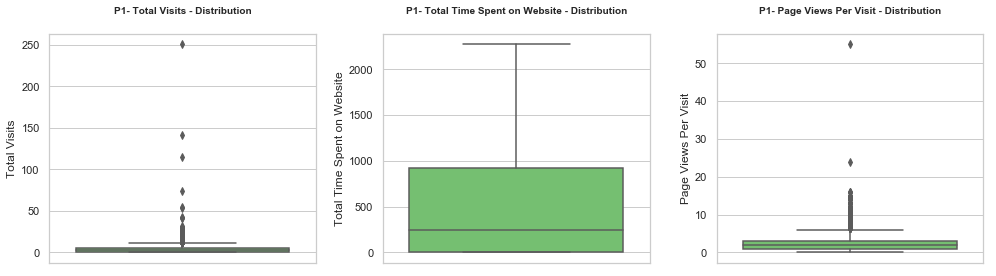

In [68]:
# Analyse for the any outliers in the Numeric ariables using boxplots (univariate)
f, axn = plt.subplots(1,3,figsize=(14,4))

# Total Visits
# 
ax1 = sns.boxplot(y=leads_data['TotalVisits'],ax=axn[0],color='g')
Title="P1- Total Visits - Distribution"
ax1.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Total Visits")

ax2 = sns.boxplot(y=leads_data['TotalWebTime'],ax=axn[1],color='g')
Title="P1- Total Time Spent on Website - Distribution"
ax2.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)
ax2.set_ylabel("Total Time Spent on Website")

ax3 = sns.boxplot(y=leads_data.PagesPerView,ax=axn[2],color='g')
Title="P1- Page Views Per Visit - Distribution"
ax3.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)
ax3.set_ylabel("Page Views Per Visit")

plt.tight_layout()
plt.show();

#### **Observations**<br>
> The numeric columns `TotalVisits` and `PagesPerVIew` has outliers.<br> 
> The outliers should be removed before standardization and PCA fo the above columns<br>

### 3.1.2 Remove outliers from TotalVisits and PagesPerview 

In [69]:
# Remove outliers from TotalVisits.
leads_data = leads_data.loc[~(leads_data.TotalVisits > 8),:]

In [70]:
# Remove outliers from PagesPerview.
leads_data = leads_data.loc[~(leads_data.PagesPerView > 6),:]

In [71]:
# Numerical Variable percentile list 
perc =[.20,.25, .40, .60, .75,.80,.85,.90,.95,.99] 
leads_data.describe(percentiles=perc)

,Converted,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00"
mean,0.37,2.58,460.61,2.03,14.15,16.17
std,0.48,2.10,539.31,1.65,1.03,1.31
min,0.00,0.00,0.00,0.00,7.00,11.00
20%,0.00,0.00,0.00,0.00,14.00,15.00
25%,0.00,0.00,0.00,0.00,14.00,16.00
40%,0.00,2.00,124.20,1.67,14.00,16.00
50%,0.00,2.00,225.00,2.00,14.00,16.00
60%,0.00,3.00,342.00,2.00,14.00,16.00
75%,1.00,4.00,866.75,3.00,14.00,16.00


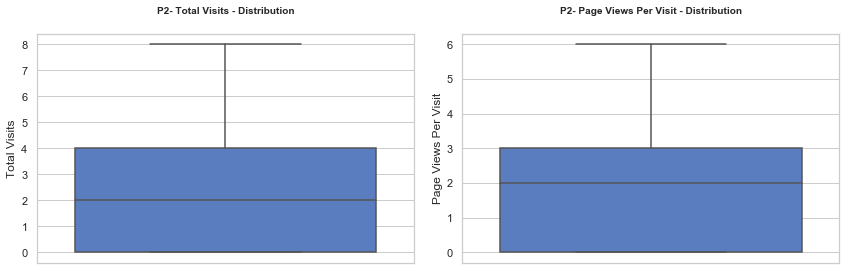

In [72]:
# Analyse for the any outliers in the Numeric variables using boxplots (univariate)
f, axn = plt.subplots(1,2,figsize=(12,4))

# Total Visits
# 
ax1 = sns.boxplot(y=leads_data['TotalVisits'],ax=axn[0],color='b')
Title="P2- Total Visits - Distribution"
ax1.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Total Visits")


ax3 = sns.boxplot(y=leads_data.PagesPerView,ax=axn[1],color='b')
Title="P2- Page Views Per Visit - Distribution"
ax3.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)
ax3.set_ylabel("Page Views Per Visit")


plt.tight_layout()
plt.show();

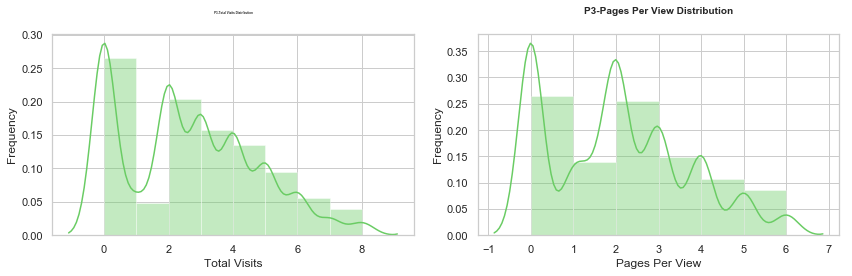

In [73]:
f, axn = plt.subplots(1,2,figsize=(12,4))

#plt.figure(figsize=(6,4))
ax1 =sns.distplot(leads_data.TotalVisits,bins=8,rug=False,kde=True,color='g',ax=axn[0])
ax1.set_xlabel("Total Visits")
ax1.set_ylabel("Frequency")
Title="P3-Total Visits Distribution"
ax1.set_title(Title,fontdict={'fontsize':3,'fontweight':'bold'},loc='center',pad=20)

ax2 =sns.distplot(leads_data.PagesPerView,bins=6,rug=False,kde=True,color='g',ax=axn[1])
ax2.set_xlabel("Pages Per View")
ax2.set_ylabel("Frequency")
Title="P3-Pages Per View Distribution"
ax2.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout();
plt.show();

### 3.1.3 Univariate Analysis - Distribution of Asymmetrique Activity Score & Profile Score 

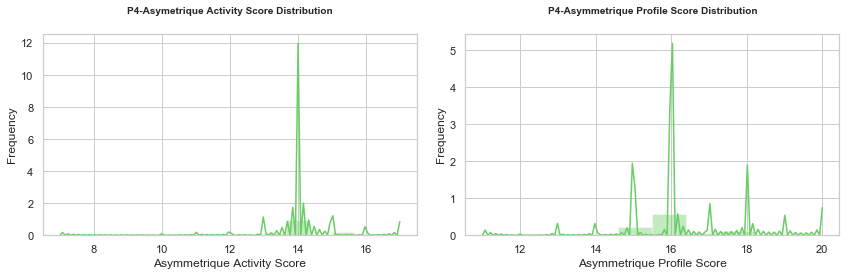

In [74]:
f, axn = plt.subplots(1,2,figsize=(12,4))

#plt.figure(figsize=(6,4))
ax1 =sns.distplot(leads_data.Asym_Activity_Score,bins=15,rug=False,kde=True,color='g',ax=axn[0])
ax1.set_xlabel("Asymmetrique Activity Score")
ax1.set_ylabel("Frequency")
Title="P4-Asymetrique Activity Score Distribution"
ax1.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)

ax2 =sns.distplot(leads_data.Asym_Profile_Score,bins=10,rug=False,kde=True,color='g',ax=axn[1])
ax2.set_xlabel("Asymmetrique Profile Score")
ax2.set_ylabel("Frequency")
Title="P4-Asymmetrique Profile Score Distribution"
ax2.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout();
plt.show();

#### **Observations**<br>
> - Univariate Distribution analysis of `Asymmtrique Activity Score and Asymmetric Profile Score`.<br> 
> - The data is in normal gaussian distribution <br>

### 3.1.5 Univariate Analysis - Distribution of Converted (Prediction Variable) 

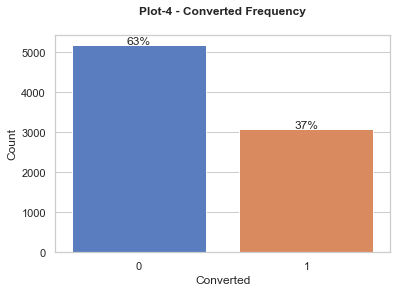

In [75]:
# Analyse visually the converted target field.

# Univariate Analysis - Plot -1
#
f, ax = plt.subplots(figsize=(6, 4))
ax =sns.countplot(x="Converted",data = leads_data,palette='muted')
Title='Plot-4 - Converted Frequency'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Converted")
ax.set_ylabel("Count")

#Annotations.
total = float(len(leads_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{0:.0%}'.format(height/total),
            ha="center") 
        
plt.show();

#### **Observations**<br>
> - The `conversion rate` is only `37%` and `63% are failed conversion`.
> - The goal is to increasing the conversion rate by identifying the potential leads termed as 'Hot Leads' and in future by communicating  effectively with these leads instead of calling customers directly.

In [76]:
###leads_data.to_csv('leads_data_verify.csv')

In [77]:
leads_data.shape

(8264, 29)

## Step 4: Bivariate Analysis

### 4.1.1 Bivariate Analysis -  Lead Origin Vs Converted 

In [78]:
# Genric Functions for annotations.
def annotations(ax,textoffset,raxis):
    for p in ax.patches:
        height,width =p.get_height(),p.get_x()
        if (~np.isnan(height)):
            ax.annotate("{:.0f}".format(height), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()),
                        ha='center', va='center', rotation=raxis, 
                        xytext=(0, textoffset), textcoords='offset points') 

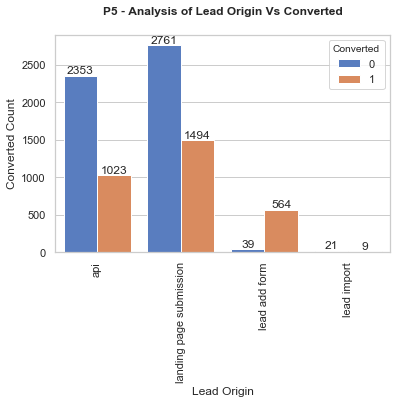

In [79]:
# Bivariate Analysis Plot-1
# Analysis of Lead Origin Vs Converted

f, ax = plt.subplots(figsize=(6, 4))
ax =sns.countplot(x="Lead_Origin",hue='Converted',data = leads_data,palette='muted')
Title='P5 - Analysis of Lead Origin Vs Converted'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Lead Origin")
ax.set_ylabel("Converted Count")

for item in ax.get_xticklabels():
    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)       
plt.show();

#### **Observations**<br>
> - Landing Page Submission and API has the largest potential of Converting the leads coming through this origins.

### 4.1.2 Bivariate Analysis -  Lead Source Vs Converted 

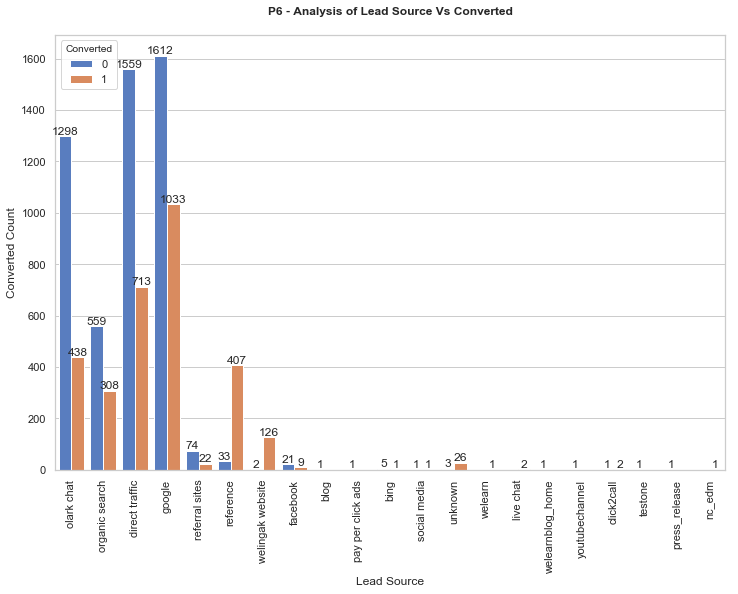

In [80]:
# Bivariate Analysis Plot-2
# Analysis of Lead Source Vs Converted

f, ax = plt.subplots(figsize=(12,8))
ax =sns.countplot(x="Lead_Source",hue='Converted',data = leads_data,palette='muted')
Title='P6 - Analysis of Lead Source Vs Converted'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Lead Source")
ax.set_ylabel("Converted Count")

for item in ax.get_xticklabels():
    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)       
plt.show();

#### **Observations**<br>
> - Google, Direct Traffic and Olark Chat are the 3 top most successful lead source for conversion.

### 4.1.3 Bivariate Analysis -  Current Occupation Vs Converted

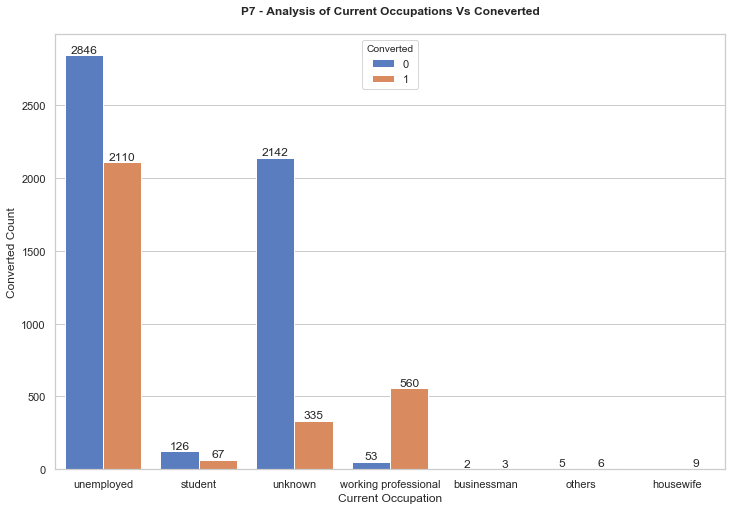

In [81]:
# Bivariate Analysis Plot-7
# Analysis of Current_Occupation Vs Converted

f, ax = plt.subplots(figsize=(12, 8))
ax =sns.countplot(x="Current_Occupation",hue='Converted',data = leads_data,palette='muted')
Title='P7 - Analysis of Current Occupations Vs Coneverted'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Current Occupation")
ax.set_ylabel("Converted Count")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)       
plt.show();

#### **Observations**<br>
> - Unemployed people are having major convesion rate. The category `Unknown` is second high as data is not populated.

### 4.1.4 Bivariate Analysis -  Country Vs Converted

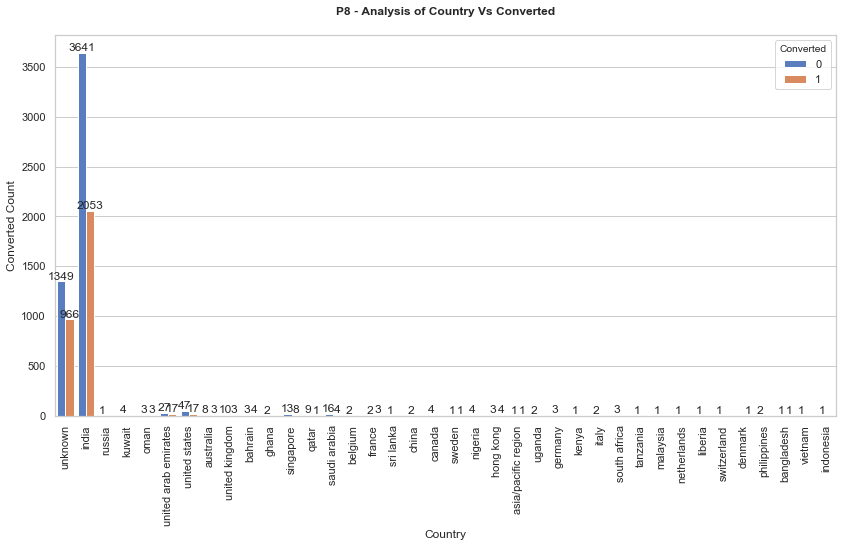

In [82]:
# Bivariate Analysis Plot-8
# Analysis of Country Vs Converted

f, ax = plt.subplots(figsize=(14,7))
ax =sns.countplot(x="Country",hue='Converted',data = leads_data,palette='muted')
Title='P8 - Analysis of Country Vs Converted'
ax.set_title(Title,fontdict={'fontsize':12,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Country")
ax.set_ylabel("Converted Count")

for item in ax.get_xticklabels():
    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)       
plt.show();

#### **Observations**<br>
> - Majority customers are from India and countries which are captured correctly in the data.

## Step 5: Visualizing the correlation between variables.

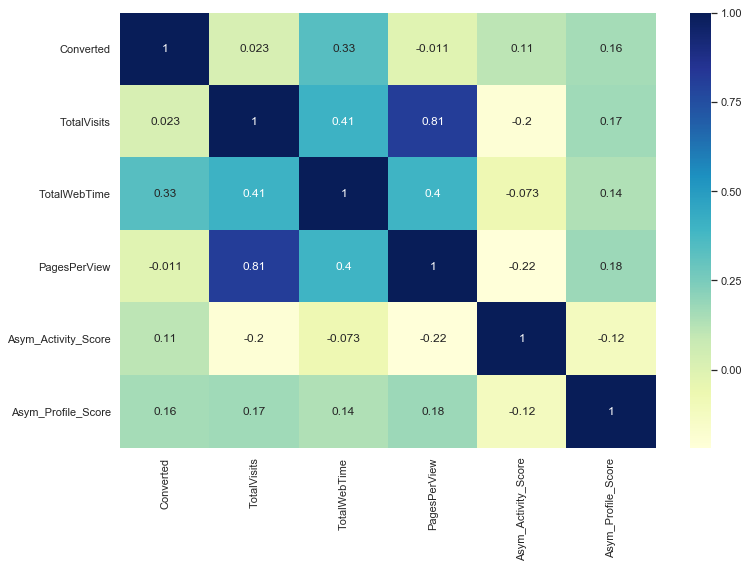

In [83]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12,8))
sns.heatmap(leads_data.corr(), annot = True, cmap="YlGnBu")
plt.show();

## STEP 6: Creating Dummy Variables for Categorical Variables.

### 6.1.1 Create Dummy for Categorical Variables

In [84]:
# Dummies for Lead_Origin.
dummy_origin = pd.get_dummies(leads_data['Lead_Origin'],prefix='lead_origin',drop_first=True)
dummy_source = pd.get_dummies(leads_data['Lead_Source'],prefix='lead_source',drop_first=True)
dummy_last_activity = pd.get_dummies(leads_data['Last_Activity'],prefix='last_activity',drop_first=True)
dummy_country = pd.get_dummies(leads_data['Country'],prefix='country',drop_first=True)
dummy_specialization = pd.get_dummies(leads_data['Specialization'],prefix='specialization',drop_first=True)
dummy_x_edu_source = pd.get_dummies(leads_data['X_Edu_Source'],prefix='x_edu_source',drop_first=True)
dummy_current_occupation = pd.get_dummies(leads_data['Current_Occupation'],prefix='current_occupation',
                                                                                  drop_first=True)
dummy_course_emphasis = pd.get_dummies(leads_data['Course_Emphasis'],prefix='course_emphais',drop_first=True)
dummy_city = pd.get_dummies(leads_data['City'],prefix='city',drop_first=True)
dummy_last_notable_activity = pd.get_dummies(leads_data['Last_Notable_Activity'],
                                                       prefix='last_notable_activity',drop_first=True)

In [85]:
#Add the results to the leads_data data frame
leads_data = pd.concat([leads_data,dummy_origin,dummy_source,dummy_last_activity,
                                  dummy_country,dummy_specialization,dummy_x_edu_source,
                                  dummy_current_occupation,dummy_course_emphasis,
                                  dummy_city,dummy_last_notable_activity], axis = 1)

In [86]:
# drop the columns as we have created the dummies.
leads_data.drop(['Lead_Origin','Lead_Source','Last_Activity',
                 'Country','Specialization','X_Edu_Source',
                 'Current_Occupation','Course_Emphasis','City',
                 'Last_Notable_Activity'], axis = 1, inplace = True)

In [87]:
# Verify the newly added dummy columns in the data frame.
pd.set_option('display.max_columns', 1200)
leads_data.head(10)

,Prospect_ID,Lead_Number,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,TotalWebTime,PagesPerView,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Asym_Activity_Score,Asym_Profile_Score,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,no,no,0,0.00,0,0.00,no,no,no,no,no,no,2,2,15.00,15.00,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### **Observations**<br>
> - There are 10 categorical variables which having more than 2 values.
> - So,the columns to be dummied out are ;
    - `Lead_Origin`,`Lead_Source`,`Last_Activity`,
    - `Country`,`Specialization`,`X_Edu_Source`,
    - `Current_Occupation`,`Course_Emphasis`,`City`,
    - `Last_Notable_Activity` 
> - Convert the values to numerical for regression analysis
> - The dummy variables data frame are concatenated with original lead data frame
> - The original 10 categorical variables are dropped
#### **Inferences**<br>
> - There are 9 categorical variables which are having either `yes` or `no` values.
> - The 9 columns values should be converted to `1-yes` and `0-No` and the variables are ;
  - `Do_Not_Email`,`Do_Not_Call`,`Search`,`Newspaper_Article'
  - `X_Edu_Forums`,`Newspaper`,`Digital_Adv`,`Thru_Recom` and `Master_Interview_Copy'.

### 6.1.2 Create Dummy for Categorical Variables having two values (Yes/No)

In [88]:
# Applying the function to the columns.
leads_data['Do_Not_Email'] = leads_data['Do_Not_Email'].map({'yes': 1, 'no': 0})
leads_data['Do_Not_Call'] = leads_data['Do_Not_Call'].map({'yes': 1, 'no': 0})
leads_data['Search'] = leads_data['Search'].map({'yes': 1, 'no': 0}.get)
leads_data['Newspaper_Article'] = leads_data['Newspaper_Article'].map({'yes': 1, 'no': 0})
leads_data['X_Edu_Forums'] = leads_data['X_Edu_Forums'].map({'yes': 1, 'no': 0})
leads_data['Newspaper'] = leads_data['Newspaper'].map({'yes': 1, 'no': 0})
leads_data['Digital_Adv'] = leads_data['Digital_Adv'].map({'yes': 1, 'no': 0})
leads_data['Thru_Recom'] = leads_data['Thru_Recom'].map({'yes': 1, 'no': 0})
leads_data['Master_Interview_Copy'] = leads_data['Master_Interview_Copy'].map({'yes': 1, 'no': 0})

In [89]:
pd.set_option('display.max_columns', 1200)
leads_data.head(10)

,Prospect_ID,Lead_Number,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,TotalWebTime,PagesPerView,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Asym_Activity_Score,Asym_Profile_Score,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,0,2,2,15.00,15.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [90]:
leads_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 0 to 9239
Data columns (total 151 columns):
Prospect_ID                                           object
Lead_Number                                           object
Do_Not_Email                                          int64
Do_Not_Call                                           int64
Converted                                             int64
TotalVisits                                           float64
TotalWebTime                                          int64
PagesPerView                                          float64
Search                                                int64
Newspaper_Article                                     int64
X_Edu_Forums                                          int64
Newspaper                                             int64
Digital_Adv                                           int64
Thru_Recom                                            int64
Asym_Activity_Index                           

### 6.1.2 Convert Asymmetrique Profile and Activity Index to int type 

In [91]:
leads_data.Asym_Activity_Index = leads_data.Asym_Activity_Index.astype('uint8')
leads_data.Asym_Profile_Index = leads_data.Asym_Profile_Index.astype('uint8')

In [92]:
leads_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8264 entries, 0 to 9239
Data columns (total 151 columns):
Prospect_ID                                           object
Lead_Number                                           object
Do_Not_Email                                          int64
Do_Not_Call                                           int64
Converted                                             int64
TotalVisits                                           float64
TotalWebTime                                          int64
PagesPerView                                          float64
Search                                                int64
Newspaper_Article                                     int64
X_Edu_Forums                                          int64
Newspaper                                             int64
Digital_Adv                                           int64
Thru_Recom                                            int64
Asym_Activity_Index                           

In [93]:
leads_data.head(10)

,Prospect_ID,Lead_Number,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,TotalWebTime,PagesPerView,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Asym_Activity_Score,Asym_Profile_Score,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,0,2,2,15.00,15.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [94]:
# now all the categorical columns are converted to numeric describe each column attribute
leads_data.describe()

,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,TotalWebTime,PagesPerView,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Asym_Activity_Score,Asym_Profile_Score,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked
count,"8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,2

In [95]:
leads_data.shape

(8264, 151)

#### **Observations**<br>
> - In Summary, Among 37 variables in the original dataset, The inisignificant 10 (6 insignificant & 2 large null value columns) columns are dropped initially. 
    - `1.Magazine`
    - `2.Receive More Updates About Our Courses`,
    - `3.Update me on Supply Chain Content`,
    - `4.Get updates on DM Content`,
    - `5.Tags`,
    - `6.I agree to pay the amount through cheque`
    
> - Further whiile analysis, the 2 columns which are having high percentage Null Values. It was decided to drop these columns as they will create bias if we impute the column with values . They are ;
    - `8.Lead Profile`
    - `9.Lead Quality`
    
> - Thus remaining 2 (excluding `Prospect_ID`,`Lead_Number` for predictions) variables for analysis as below ;
    - The 9 categorical variables having binary values (`yes' or `no') converted to 1 and 0. They are ;
      - `1. Do Not Email`
      - `2. Do Not Call`
      - `3. Search`
      - `4. Newspaper Article`
      - `5. How did you hear about X Education`,
      - `6. Newspaper`
      - `7. Digital `
      - `8. Through Recommendations` and,
      - `9. A free copy of Mastering The Interview`<br>
> -<br>  
    - The 10 categorical variables which having more than 2 values.
      - `10. Lead_Origin`
      - `11. Lead_Source`
      - `12. Last_Activity`
      - `13. Country`
      - `14. Specialization`
      - `15. X_Edu_Source`
      - `16. Current_Occupation`
      - `17. Course_Emphasis`
      - `18. City`
      - `19. Last_Notable_Activity`<br>
> -<br> 
    - The remaining 6 remaining numerical variables 
      - `20. Converted`
      - `21. TotalVisits`
      - `22. Total Time Spent on Website`
      - `23. Page Views Per Visit`
      - `24. Asymmetrique Activity Index`
      - `25. Asymmetrique Profile Index`
      - `26. Asymmetrique Activity Score`
      - `27. Asymmetrique Profile Score`
  
  - The data type of `Asymmetrique Profile Index` and `Asymmetrique Activity Index` changed to integer type from string type.  

## Step 8: Scaling 
 > - There are variables with float and int numerical values ( excluding the dummy and newly created binary value coumns).
 > - Hence it is very important we have to rescale the variables so that they have a comparable scale
 > - So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

### 8.1 Normalising the Numerical Variables.

In [96]:
# Normalising Numerical features
df_norm = leads_data[['TotalVisits','TotalWebTime','PagesPerView','Asym_Activity_Score','Asym_Profile_Score']]

In [97]:
df_norm.shape

(8264, 5)

In [98]:
df_norm.describe()

,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"8,264.00","8,264.00","8,264.00","8,264.00","8,264.00"
mean,2.58,460.61,2.03,14.15,16.17
std,2.10,539.31,1.65,1.03,1.31
min,0.00,0.00,0.00,7.00,11.00
25%,0.00,0.00,0.00,14.00,16.00
50%,2.00,225.00,2.00,14.00,16.00
75%,4.00,866.75,3.00,14.00,16.00
max,8.00,"2,272.00",6.00,17.00,20.00


In [99]:
leads_norm=(df_norm-df_norm.mean())/df_norm.std()

In [100]:
leads_norm = pd.DataFrame(leads_norm)
leads_norm.columns = ['TotalVisits','TotalWebTime','PagesPerView','Asym_Activity_Score','Asym_Profile_Score']
leads_norm.describe()
leads_norm.isnull().sum()

,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"8,264.00","8,264.00","8,264.00","8,264.00","8,264.00"
mean,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.23,-0.85,-1.23,-6.94,-3.93
25%,-1.23,-0.85,-1.23,-0.15,-0.13
50%,-0.27,-0.44,-0.02,-0.15,-0.13
75%,0.68,0.75,0.59,-0.15,-0.13
max,2.59,3.36,2.41,2.76,2.92


TotalVisits            0
TotalWebTime           0
PagesPerView           0
Asym_Activity_Score    0
Asym_Profile_Score     0
dtype: int64

In [101]:
leads_data.shape
leads_norm.shape

(8264, 151)

(8264, 5)

#### **Observations**<br>
> - The data is cleaned of missing values and outliers and finally scaled to standardize all the column in the same scale.
> - THe number of rows in the final data 8264 rows and 151 columns

### 8.2 Merge the normalized data set to the original data.

In [102]:
# Drop the original numerical columns from leads_data.

leads_data.drop(columns=['TotalVisits','TotalWebTime','PagesPerView',
                                      'Asym_Activity_Score','Asym_Profile_Score'],axis=1,inplace=True)

In [103]:
# merge leads_data and normalized leads_norm together.
leads_data = pd.concat([leads_data,leads_norm],axis=1)

In [104]:
leads_data.shape

(8264, 151)

In [105]:
leads_data.describe()

,Do_Not_Email,Do_Not_Call,Converted,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,264.00","8,2

### Step 10: Checking the conversion rate after cleaning and standardisation 

In [106]:
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

37.39109390125847

#### **Observations**<br>
> - After cleaning up the data and scaling the conversion rate is `37.39%`

## Step 9 : Model Building ( RFE Model)
> - split our data into a training set and a test set.

### Step 9.1: Splitting the Data into Training and Testing Sets

In [107]:
# Putting feature variable to X
X = leads_data.drop(['Prospect_ID','Lead_Number','Converted'],axis=1)#

# Putting response variable to y
#'Prospect_ID','Lead_Number','Converted']]
#y = leads_data['Converted']
y1=leads_data['Converted']
 
X.shape

(8264, 148)

In [108]:
from sklearn.model_selection import train_test_split

# split the analyze data frame to train and test data frame 70% and 30% respectively.

np.random.seed(0)
X_train, X_test,y_train,y_test =  train_test_split(X,y1, train_size=0.7,
                                                   test_size=0.3,random_state=100)

In [109]:
X_train.head()

,Do_Not_Email,Do_Not_Call,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
756,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### **Observations** 
> - The data is ready for regression analysis..
> - The data is split in to 70% for train and 30% test data 
#### **Inferences** 
> - The `X_train` set is used by the model to learn to generate a best fit logistic regression model using `y_train`.
> - The `X_test` set will be used to validate the correctness or predict the model.

In [110]:
X_train.describe()

,Do_Not_Email,Do_Not_Call,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,

### Step 9.2: Feature Selection Using RFE

In [111]:
#RFE Model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [112]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('Do_Not_Call', False, 90),
 ('Search', False, 76),
 ('Newspaper_Article', False, 126),
 ('X_Edu_Forums', False, 125),
 ('Newspaper', False, 124),
 ('Digital_Adv', False, 31),
 ('Thru_Recom', False, 58),
 ('Asym_Activity_Index', False, 13),
 ('Asym_Profile_Index', False, 12),
 ('Master_Interview_Copy', False, 47),
 ('lead_origin_landing page submission', True, 1),
 ('lead_origin_lead add form', True, 1),
 ('lead_origin_lead import', False, 19),
 ('lead_source_blog', False, 107),
 ('lead_source_click2call', False, 132),
 ('lead_source_direct traffic', False, 63),
 ('lead_source_facebook', False, 51),
 ('lead_source_google', False, 80),
 ('lead_source_live chat', False, 115),
 ('lead_source_nc_edm', False, 129),
 ('lead_source_olark chat', False, 64),
 ('lead_source_organic search', False, 73),
 ('lead_source_pay per click ads', False, 78),
 ('lead_source_press_release', False, 89),
 ('lead_source_reference', False, 34),
 ('lead_source_referral sites', False,

In [114]:
col = X_train.columns[rfe.support_]

#### **Observations** 
> - We use Recursive Feature Elimination Method to remove less significant and high collinearity columns from the model for better predictions.
> - We also use statsmodel to check for the P-Values and VIF to decide on the feature elimination manually.

### Step 9.3: Assessing the model with StatsModels

In [115]:
#Stats Model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5784
Model:                            GLM   Df Residuals:                     5768
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2334.8
Date:                Mon, 22 Jul 2019   Deviance:                       4669.6
Time:                        10:45:03   Pearson chi2:                 5.81e+03
No. Iterations:                    21   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7929      0.121     -6.558      0.000      -1.030      -0.556
Do_Not_Email                                     -1.3494      0.204     -6.610      0.000      -1.750      -0.949
lead_origin_landing page submission              -0.3794      0.093     -4.065      0.000      -0.562      -0.196
lead_origin_lead add form                         2.1909      0.219      9.995      0.000       1.761       2.621
lead_source_welingak website                      2.1397      0.750      2.854      0.004       0.670       3.609
last_activity_email bounced                      -1.3990      0.433     -3.232      0.001      -2.247      -0.551
last_activity_olark chat conversation            -1.1864      0.198     -6.006      0.000      -1.574      -0.799
country_unknown                                   1.1986      0.123      9.721      0.000       0.957       1.440
current_occupation_housewife                     23.0596   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
current_occupation_working professional           2.5127      0.200     12.586      0.000       2.121       2.904
course_emphais_better career prospects            1.2219      0.092     13.237      0.000       1.041       1.403
last_notable_activity_email link clicked         -1.6967      0.276     -6.157      0.000      -2.237      -1.157
last_notable_activity_email opened               -1.2745      0.091    -13.939      0.000      -1.454      -1.095
last_notable_activity_modified                   -1.5807      0.099    -15.928      0.000      -1.775      -1.386
last_notable_activity_olark chat conversation    -1.4628      0.386     -3.788      0.000      -2.220      -0.706
TotalWebTime                                      1.1058      0.043     25.512      0.000       1.021       1.191
=================================================================================================================
"""

#### **Observations** 
> - The column `Current_Occupation_housewife` seems to be high P-Value of `0.999` and can be removed .

In [116]:
x_train1 = X_train_sm.drop(['current_occupation_housewife'], axis = 1)

In [117]:
X_train_sm1 = sm.add_constant(x_train1)
logm3 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5784
Model:                            GLM   Df Residuals:                     5769
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2341.8
Date:                Mon, 22 Jul 2019   Deviance:                       4683.6
Time:                        10:45:03   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7989      0.121     -6.615      0.000      -1.036      -0.562
Do_Not_Email                                     -1.3529      0.204     -6.626      0.000      -1.753      -0.953
lead_origin_landing page submission              -0.3732      0.093     -4.005      0.000      -0.556      -0.191
lead_origin_lead add form                         2.2250      0.219     10.168      0.000       1.796       2.654
lead_source_welingak website                      2.1059      0.750      2.809      0.005       0.637       3.575
last_activity_email bounced                      -1.3975      0.433     -3.230      0.001      -2.246      -0.549
last_activity_olark chat conversation            -1.1897      0.197     -6.025      0.000      -1.577      -0.803
country_unknown                                   1.1913      0.123      9.685      0.000       0.950       1.432
current_occupation_working professional           2.5030      0.200     12.542      0.000       2.112       2.894
course_emphais_better career prospects            1.2265      0.092     13.299      0.000       1.046       1.407
last_notable_activity_email link clicked         -1.6788      0.273     -6.141      0.000      -2.215      -1.143
last_notable_activity_email opened               -1.2666      0.091    -13.869      0.000      -1.446      -1.088
last_notable_activity_modified                   -1.5706      0.099    -15.858      0.000      -1.765      -1.376
last_notable_activity_olark chat conversation    -1.4528      0.386     -3.762      0.000      -2.210      -0.696
TotalWebTime                                      1.1036      0.043     25.515      0.000       1.019       1.188
=================================================================================================================
"""

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.47
7,country_unknown,2.34
12,last_notable_activity_modified,1.80
6,last_activity_olark chat conversation,1.79
1,Do_Not_Email,1.75
3,lead_origin_lead add form,1.74
5,last_activity_email bounced,1.74
2,lead_origin_landing page submission,1.73
11,last_notable_activity_email opened,1.53
14,TotalWebTime,1.37


#### **Observations** 
> - All 14 column has very good p-values and also VIF well below the threshold values.
> - The model is used for predicting the X_train prediction.

In [120]:
### Step 9.4: Extract the Features and Coefficient from the Final RFE Model

In [121]:
res_dict = dict(res.params)
res_coef = pd.DataFrame(list(res_dict.items()), columns=['Features', 'Coefficients'])
res_coef

,Features,Coefficients
0,const,-0.80
1,Do_Not_Email,-1.35
2,lead_origin_landing page submission,-0.37
3,lead_origin_lead add form,2.23
4,lead_source_welingak website,2.11
5,last_activity_email bounced,-1.40
6,last_activity_olark chat conversation,-1.19
7,country_unknown,1.19
8,current_occupation_working professional,2.50
9,course_emphais_better career prospects,1.23


In [122]:
res_coef.reindex(res_coef['Coefficients'].abs().sort_values(ascending=False).index)

,Features,Coefficients
8,current_occupation_working professional,2.50
3,lead_origin_lead add form,2.23
4,lead_source_welingak website,2.11
10,last_notable_activity_email link clicked,-1.68
12,last_notable_activity_modified,-1.57
13,last_notable_activity_olark chat conversation,-1.45
5,last_activity_email bounced,-1.40
1,Do_Not_Email,-1.35
11,last_notable_activity_email opened,-1.27
9,course_emphais_better career prospects,1.23


#### **Observations** 
> - From the final 14 set of features the top three based on descending order of magnitude of coefficients ;
  - 1. current_occupation_working professional
  - 2. lead_origin_lead add form
  - 3. lead_source_welingak website

### Step 9.4: Make Prediction based on RFE Model

In [123]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm1)

In [124]:
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

756    0.02
9060   0.40
3616   0.17
7254   0.42
6037   0.49
4170   0.73
8825   0.36
2391   0.64
5589   0.26
7380   0.14
dtype: float64

array([0.02482174, 0.4025283 , 0.1691312 , 0.41638204, 0.48637951,
       0.7335981 , 0.3565839 , 0.64439263, 0.25903462, 0.1398235 ])

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index#

In [126]:
#Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,predicted
0,0,0.02,756,0
1,0,0.40,9060,0
2,1,0.17,3616,0
3,0,0.42,7254,0
4,1,0.49,6037,0


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8162171507607192


#### **Observations** 
> - From the train dataset, we have received a reasonable good accuracy Rate.
> - The accuracy rate for the train data is around ***`82%`***.
> - We will continue check other metrics such confusion metrix, specifity , sensitivity etc.,

### Step 9.5: Model Evaluation

#### Step 9.5.1: Confusion matrix

In [128]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3250,  379],
       [ 684, 1471]])

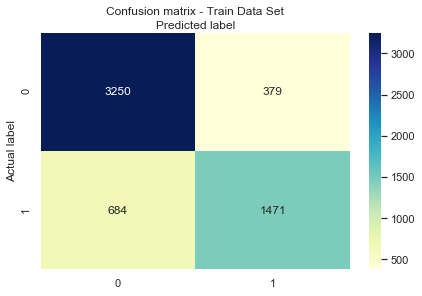

In [129]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Train Data Set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [130]:
# Calculate scores.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's see the sensitivity,Specifity of our logistic regression model
print("Sensitivity    :",TP / float(TP+FN))
print("Specificity    :",TN / float(TN+FP))
print("False Positive Rate  :", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+ FN))

Sensitivity    : 0.6825986078886311
Specificity    : 0.8955635161201433
False Positive Rate  : 0.10443648387985671
Positive Predictive Value : 0.7951351351351351
Negative Predictive Value : 0.826131164209456


#### **Observations** 
> -  From the confusion the number of True positive as `1471` and True Negative are `3250`
> -  Following are the metrics obtained from the predictions;
     - sensitivity                   -***` 0.6825986078886311  - (~68%)`*** 
     - specifity                     -***` 0.8955635161201433  - (~90%)`***
     - false postive rate            -***` 0.10443648387985671 - (~10%)`***
     - positive predictive value     -***` 0.7951351351351351  - (~80%)`***
     - Negative predictive value     -*** `0.826131164209456   - ~(83%)`***

####  Step 9.5.2: Plotting the ROC Curve
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
#Plotting ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example - Train')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

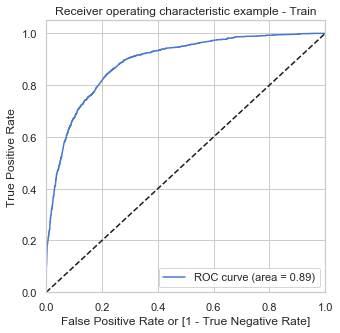

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

####  Step 9.5.3: Calculation of Optimal Cut-off Point

 - Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
#Finding Optimual Cut-off Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.02,756,0,1,0,0,0,0,0,0,0,0,0
1,0,0.40,9060,0,1,1,1,1,1,0,0,0,0,0
2,1,0.17,3616,0,1,1,0,0,0,0,0,0,0,0
3,0,0.42,7254,0,1,1,1,1,1,0,0,0,0,0
4,1,0.49,6037,0,1,1,1,1,1,0,0,0,0,0


In [136]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specitivity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensitivity  specitivity
0.00  0.00      0.37         1.00         0.00
0.10  0.10      0.60         0.98         0.37
0.20  0.20      0.77         0.91         0.68
0.30  0.30      0.80         0.86         0.76
0.40  0.40      0.81         0.75         0.85
0.50  0.50      0.82         0.68         0.90
0.60  0.60      0.81         0.62         0.92
0.70  0.70      0.78         0.51         0.95
0.80  0.80      0.76         0.41         0.97
0.90  0.90      0.72         0.26         0.99


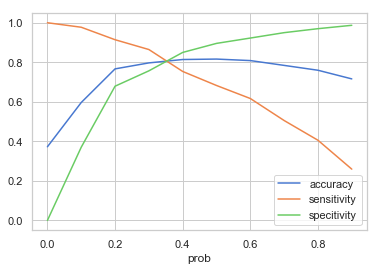

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specitivity'])
plt.show();

#### **Observations** 
> -  From the curve above,`0.35` is the optimum point to take it as a cutoff probability.

#### Step 9.5.4: Re- Calculate metrics for Optimum Cut Off 

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.02,756,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.40,9060,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.17,3616,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.42,7254,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.49,6037,0,1,1,1,1,1,0,0,0,0,0,1


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8060165975103735

####  Step 9.5.5: Recalculating Confusion matrix 

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2866,  763],
       [ 359, 1796]])

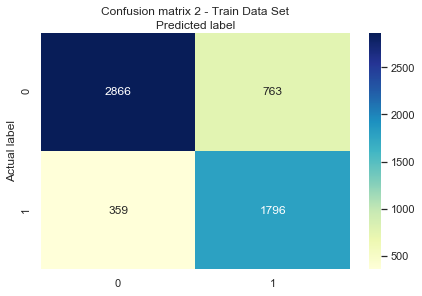

In [141]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix 2 - Train Data Set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [142]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity  :", TP2 / float(TP2+FN2))
print("Specificity  :", TN2 / float(TN2+FP2))
print("False Positive Rate: ", FP2/ float(TN2+FP2))
print ("Positive Predictive Value   : ",  TP2 / float(TP2+FP2))
print ("Negative Predictive Value   : ",  TN2 / float(TN2+ FN2))

Sensitivity  : 0.8334106728538283
Specificity  : 0.7897492422154864
False Positive Rate:  0.21025075778451363
Positive Predictive Value   :  0.7018366549433372
Negative Predictive Value   :  0.8886821705426357


#### **Observations** 
> -  Making the revised optimum the metrics are ;
> -  Following are the metrics obtained from the predictions;
     - sensitivity                   -***` 0.837  - (~83%)`*** 
     - specifity                     -***` 0.797  - (~80%)`***
     - false postive rate            -***` 0.203  - (~20%)`***
     - positive predictive value     -***` 0.713  - (~71%)`***
     - Negative predictive value     -***` 0.889  - ~(89%)`***

####  Step 9.5.6: Precision and Recall  

>- Based on Confusion Matrix 
   - Precision -  TP2 / TP2 + FP2
   - Recall     - TP2 / TP2 + FN2

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
print("Precision : ", TP2/(TP2+FP2))
print("Recall    : ", TP2/(TP2+FN2))

Precision :  0.7018366549433372
Recall    :  0.8334106728538283


#### Step 9.5.7: Precision and Recall tradeoff 

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

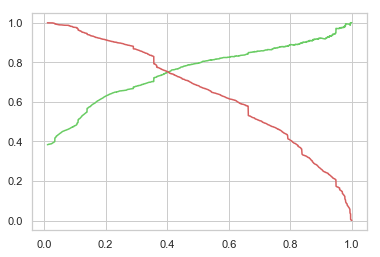

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show();

### Step 9.6: Making predictions on the test set

In [148]:
X_test.head()

,Do_Not_Email,Do_Not_Call,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
2567,0,0,0,0,0,0,0,0,2,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [149]:
X_test.describe()

,Do_Not_Email,Do_Not_Call,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,480.00","2,

In [150]:
X_test_sm = sm.add_constant(X_test)

In [151]:
#Predict
y_test_pred = res.predict(X_test_sm[X_train_sm1.columns])

#### **Observations** 
> -  Apply the Logistic Regression Model (trained) to the target test data set.
> - The test dataset contains 2480 rows.

In [152]:
y_test_pred[:10]

2567   0.17
408    0.04
5175   0.93
1912   0.11
5782   0.03
7353   0.04
883    0.10
9047   0.04
3251   0.09
1094   0.04
dtype: float64

In [153]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
2567,0.17
408,0.04
5175,0.93
1912,0.11
5782,0.03


In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

#index to a new column ID
y_test_df['ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_test_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
y_pred_test_final.head()

,Converted,ID,0
0,0,2567,0.17
1,0,408,0.04
2,1,5175,0.93
3,0,1912,0.11
4,0,5782,0.03


In [156]:
# Renaming the column 
y_pred_test_final= y_pred_test_final.rename(columns={ 0 : 'Conversion_Prob'})

# Rearranging the columns
y_pred_test_final = y_pred_test_final.reindex(['ID','Converted','Conversion_Prob'], axis=1)

In [157]:
# Check the y_pred_test_final 
y_pred_test_final.head()

,ID,Converted,Conversion_Prob
0,2567,0,0.17
1,408,0,0.04
2,5175,1,0.93
3,1912,0,0.11
4,5782,0,0.03


In [158]:
y_pred_test_final['final_predicted'] = y_pred_test_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_test_final.head()

,ID,Converted,Conversion_Prob,final_predicted
0,2567,0,0.17,0
1,408,0,0.04,0
2,5175,1,0.93,1
3,1912,0,0.11,0
4,5782,0,0.03,0


In [159]:
# Let's check the overall accuracy.
from sklearn import metrics
print ("RFE Accuracy Score: ",
       metrics.accuracy_score(y_pred_test_final.Converted, y_pred_test_final.final_predicted))

RFE Accuracy Score:  0.8116935483870967


#### **Observations** 
> - From the test dataset, we have received a  good accuracy Rate.
> - The accuracy rate for the test data is around ***`81%`***.
> - We will continue check other metrics such confusion metrix, specifity , sensitivity etc., for test data set.

### Step 9.7: Model Evaluation - Test Dataset

#### Step 9.7.1: Confusion Matrix - Test DataSet

In [160]:
confusion3 = metrics.confusion_matrix(y_pred_test_final.Converted, y_pred_test_final.final_predicted )
confusion3

array([[1231,  314],
       [ 153,  782]])

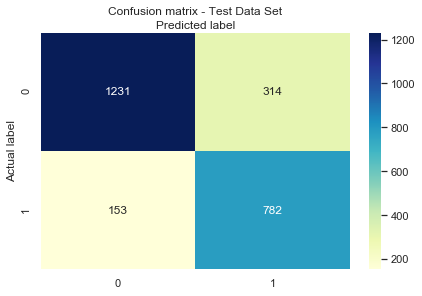

In [161]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Test Data Set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [162]:
TP3 = confusion3[1,1] # true positive 
TN3 = confusion3[0,0] # true negatives
FP3 = confusion3[0,1] # false positives
FN3 = confusion3[1,0] # false negatives

In [163]:
# Let's see the sensitivity, specificity,Falase Positive Rate, 
# Positive Predictive Value, Negative Predictive Value of the test model

print("RFE Sensitivity  :", TP3 / float(TP3+FN3))
print("RFE Specificity  :", TN3 / float(TN3+FP3))
print("RFE False Positive Rate :",FP3/ float(TN3+FP3)) 
print("RFE Positive Predictive Value :",TP3/float(TP3+FP3))
print("RFE Negative Predictive Value :", TN3 / float(TN3+FN3))

RFE Sensitivity  : 0.8363636363636363
RFE Specificity  : 0.7967637540453074
RFE False Positive Rate : 0.20323624595469256
RFE Positive Predictive Value : 0.7135036496350365
RFE Negative Predictive Value : 0.8894508670520231


In [164]:
#Percision and Recall
from sklearn.metrics import precision_score, recall_score

# Precision Score.
print ("RFE Precision Score :", 
        precision_score(y_pred_test_final.Converted, y_pred_test_final.final_predicted ))

#Recall Score
print("RFE Recall Score: ", 
        recall_score(y_pred_test_final.Converted, y_pred_test_final.final_predicted))

RFE Precision Score : 0.7135036496350365
RFE Recall Score:  0.8363636363636363


#### Step 9.7.2: Calculating Lead Score

In [165]:
#Creation of Lead Score=Conversion_Prob * 100
y_pred_test_final['lead_score']=y_pred_test_final.Conversion_Prob *100
y_pred_test_final.head()

,ID,Converted,Conversion_Prob,final_predicted,lead_score
0,2567,0,0.17,0,17.23
1,408,0,0.04,0,4.02
2,5175,1,0.93,1,92.57
3,1912,0,0.11,0,11.07
4,5782,0,0.03,0,3.30


#### Step 9.7.3: Plotting the ROC Curve

In [166]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_test_final.Converted,
                                         y_pred_test_final.Conversion_Prob, 
                                         drop_intermediate = False )

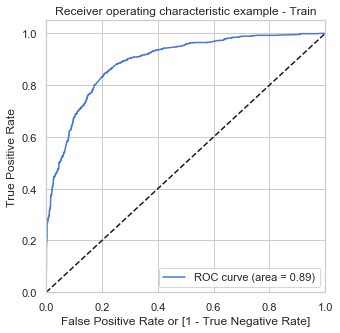

In [167]:
draw_roc(y_pred_test_final.Converted, y_pred_test_final.Conversion_Prob)

#### **Observations** 
> - The Model has predicted good accuracy of `81%` with test data set.
> - The other metrics include; 
> - Sensitivity                 :  **`0.836  (~84%)`**
> - Specificity                 :  **`0.796  (~80%)`**
> - False Positive Rate         :  **`0.203  (~20%)`**
> - Negative Predictive Value   :  **`0.889  (~89%)`**
> - RFE Precision Score         :  **`0.713  (~71%)`**
> - RFE Recall Score            :  **`0.836  (~84%)`**

> - The ROC Curve Area having value **`0.89`**

## Step 10 : Model Building ( PCA Model)

> - split our data into a training set and a test set.

### Step 10.1: Splitting the Data into Training and Testing Sets for PCA

In [168]:
# Putting feature variable to X
X = leads_data.drop(['Prospect_ID','Lead_Number','Converted'],axis=1)

# Putting response variable to y
#'Prospect_ID','Lead_Number','Converted']]
#y = leads_data['Converted']
y = leads_data['Converted']
 
X.shape
y.shape

(8264, 148)

(8264,)

In [169]:
from sklearn.model_selection import train_test_split

# split the analyze data frame to train and test data frame 70% and 30% respectively.

np.random.seed(0)
X_train1, X_test1,y_train1,y_test1 =  train_test_split(X,y, train_size=0.7,
                                                   test_size=0.3,random_state=100)

In [170]:
X_train1.describe()

,Do_Not_Email,Do_Not_Call,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
count,"5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,784.00","5,

#### **Observations** 
> - The leads Data after cleaning up for missing values and standardization is considered for regression analysis PCA.
#### **Inferences** 
> - The `X_train1` set is used by the model to learn to generate a best fit logistic regression model using `y_train1` while applying PCA.
> - The `X_test1` set will be used to validate the correctness or predict the model.

### Step10.2: PCA Analysis
>- While computng the principal components, we will calculate PC using the train data and apply them later on the test data. 
>- Initially, Run the PCA on the entire data used SVD method and try to find number PC components.

In [171]:
#Improting the PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X_train1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Step 10.2.1  PCA Analysis:  plot the principal components
- We will plot to see how many PC explains the variance

In [172]:
pca.components_

array([[ 1.70312541e-03, -1.21123093e-04,  3.44759731e-04, ...,
         4.91339812e-01, -2.08038238e-01,  2.24938268e-01],
       [-5.20538901e-03, -2.00842355e-06, -8.34507875e-05, ...,
         2.36663755e-02, -1.08746977e-02, -7.42583144e-02],
       [ 4.10640374e-03,  1.15052510e-04, -1.88018899e-04, ...,
        -2.23461508e-01, -4.22670098e-01,  6.78444298e-01],
       ...,
       [ 0.00000000e+00, -1.40500544e-16,  7.18399596e-17, ...,
        -1.94289029e-16,  1.38777878e-16,  1.38777878e-16],
       [ 0.00000000e+00,  8.19445251e-17,  4.31684405e-19, ...,
         9.41232859e-20,  1.31123248e-20, -9.08709734e-20],
       [ 0.00000000e+00, -1.30224064e-16,  2.99621758e-17, ...,
         1.24900090e-16, -1.04083409e-17,  0.00000000e+00]])

In [173]:
colnames = list(X_train1.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.00,-0.01,Do_Not_Email
1,-0.00,-0.00,Do_Not_Call
2,0.00,-0.00,Search
3,-0.00,-0.00,Newspaper_Article
4,0.00,-0.00,X_Edu_Forums


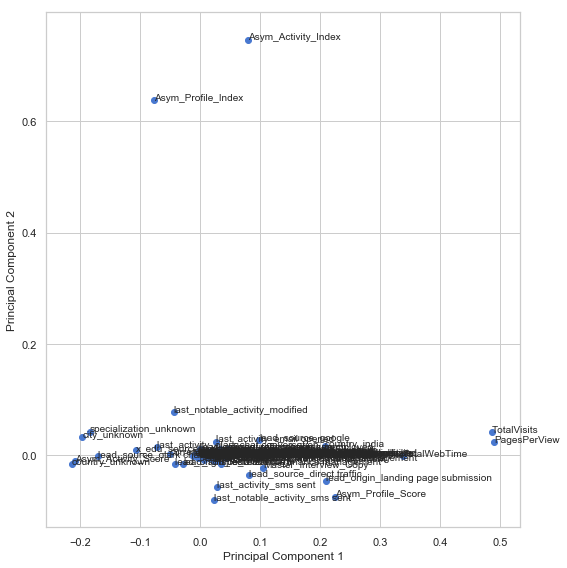

In [174]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show();

#### Step 10.2.3: PCA Analysis: Explained Variance Versus Cumulative Explain Variance Ratio

In [175]:
# List out the explain variance ratio of the initial PCA model for 148 features.

var_exp = pca.explained_variance_
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [25.4 13.5  9.2  7.6  6.   4.8  4.5  4.3  2.9  2.5  1.5  1.5  1.3  0.9
  0.8  0.8  0.8  0.7  0.7  0.6  0.6  0.5  0.5  0.5  0.4  0.4  0.4  0.4
  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]


In [176]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([25.43, 38.97, 48.13, 55.7 , 61.73, 66.48, 71.02, 75.29, 78.18,
       80.65, 82.17, 83.66, 84.95, 85.85, 86.68, 87.48, 88.26, 88.98,
       89.7 , 90.34, 90.92, 91.46, 91.96, 92.45, 92.89, 93.29, 93.67,
       94.03, 94.37, 94.69, 94.98, 95.27, 95.55, 95.8 , 96.05, 96.28,
       96.5 , 96.7 , 96.9 , 97.09, 97.26, 97.43, 97.59, 97.75, 97.9 ,
       98.04, 98.18, 98.31, 98.43, 98.54, 98.64, 98.74, 98.83, 98.92,
       99.  , 99.08, 99.15, 99.21, 99.27, 99.33, 99.38, 99.43, 99.47,
       99.51, 99.55, 99.59, 99.62, 99.65, 99.68, 99.71, 99.73, 99.75,
       99.77, 99.79, 99.8 , 99.81, 99.82, 99.83, 99.84, 99.85, 99.86,
       99.87, 99.88, 99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94,

#### Step 10.2.4: PCA Analysis: Scree Plot

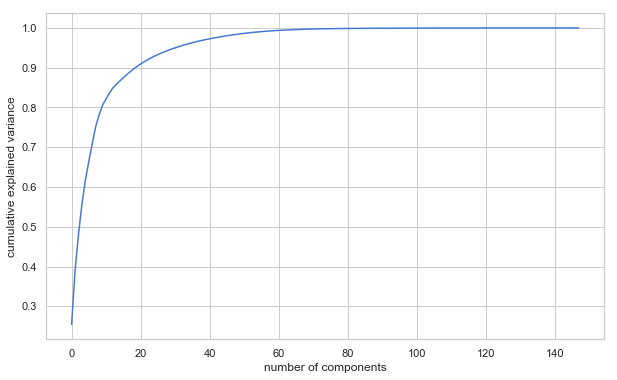

In [177]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

In [178]:
# Verify the number PC selected for 0.95 cumulative variance.
pca_again = PCA(0.95)
df_train_pca2 = pca_again.fit_transform(X_train1)
df_train_pca2.shape

(5784, 32)

In [179]:
np.cumsum(np.round(pca_again.explained_variance_ratio_, decimals=4)*100)

array([25.43, 38.97, 48.13, 55.7 , 61.73, 66.48, 71.02, 75.29, 78.18,
       80.65, 82.17, 83.66, 84.95, 85.85, 86.68, 87.48, 88.26, 88.98,
       89.7 , 90.34, 90.92, 91.46, 91.96, 92.45, 92.89, 93.29, 93.67,
       94.03, 94.37, 94.69, 94.98, 95.27])

#### **Observations** 
> - So, the `95%` of the variance can be explained by 32 components for the model. 
> - So, we will be using these 32 optimum PC for our Model to calculate the accuracy score.

#### Step 10.2.5: PCA Analysis: Incremental PCA for identified 32 PC.

In [180]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=32)

In [181]:
# Create final PCA model with 32 components.

final_train_pca = pca_final.fit_transform(X_train1)
final_train_pca.shape

(5784, 32)

In [182]:
print(np.cumsum(np.round(pca_final.explained_variance_ratio_, decimals=4)*100))

[25.43 38.97 48.13 55.7  61.73 66.48 71.02 75.29 78.18 80.65 82.17 83.66
 84.95 85.85 86.68 87.48 88.26 88.98 89.69 90.33 90.91 91.45 91.95 92.44
 92.87 93.27 93.64 94.   94.33 94.65 94.94 95.21]


In [183]:
# Dump components relations with 32 features:
pca_final_df = pd.DataFrame(pca_final.components_,columns=X_train1.columns,
                            index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6',
                                     'PC-7','PC-8','PC-9','PC-10','PC-11','PC-12',
                                     'PC-13','PC-14','PC-15','PC-16','PC-17',
                                     'PC-18','PC-19','PC-20','PC-21','PC-22',
                                     'PC-23','PC-24','PC-25','PC-26','PC-27',
                                     'PC-28','PC-29','PC-30','PC-31','PC-32'])
pca_final_df.head()
pca_final_df.columns.shape

,Do_Not_Email,Do_Not_Call,Search,Newspaper_Article,X_Edu_Forums,Newspaper,Digital_Adv,Thru_Recom,Asym_Activity_Index,Asym_Profile_Index,Master_Interview_Copy,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_source_blog,lead_source_click2call,lead_source_direct traffic,lead_source_facebook,lead_source_google,lead_source_live chat,lead_source_nc_edm,lead_source_olark chat,lead_source_organic search,lead_source_pay per click ads,lead_source_press_release,lead_source_reference,lead_source_referral sites,lead_source_social media,lead_source_testone,lead_source_unknown,lead_source_welearn,lead_source_welearnblog_home,lead_source_welingak website,lead_source_youtubechannel,last_activity_converted to lead,last_activity_email bounced,last_activity_email link clicked,last_activity_email marked spam,last_activity_email opened,last_activity_email received,last_activity_form submitted on website,last_activity_had a phone conversation,last_activity_olark chat conversation,last_activity_page visited on website,last_activity_resubscribed to emails,last_activity_sms sent,last_activity_unreachable,last_activity_unsubscribed,last_activity_view in browser link clicked,last_activity_visited booth in tradeshow,country_australia,country_bahrain,country_bangladesh,country_belgium,country_canada,country_china,country_denmark,country_france,country_germany,country_ghana,country_hong kong,country_india,country_indonesia,country_italy,country_kenya,country_kuwait,country_liberia,country_malaysia,country_netherlands,country_nigeria,country_oman,country_philippines,country_qatar,country_russia,country_saudi arabia,country_singapore,country_south africa,country_sri lanka,country_sweden,country_switzerland,country_tanzania,country_uganda,country_united arab emirates,country_united kingdom,country_united states,country_unknown,country_vietnam,specialization_business administration,specialization_e-business,specialization_e-commerce,specialization_finance management,specialization_healthcare management,specialization_hospitality management,specialization_human resource management,specialization_international business,specialization_it projects management,specialization_marketing management,specialization_media and advertising,specialization_operations management,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,specialization_unknown,x_edu_source_email,x_edu_source_multiple sources,x_edu_source_online search,x_edu_source_others,x_edu_source_sms,x_edu_source_social media,x_edu_source_student of someschool,x_edu_source_unknown,x_edu_source_word of mouth,current_occupation_housewife,current_occupation_others,current_occupation_student,current_occupation_unemployed,current_occupation_unknown,current_occupation_working professional,course_emphais_better career prospects,course_emphais_flexibility & convenience,course_emphais_others,city_other cities,city_other cities of maharashtra,city_other metro cities,city_tier ii cities,city_unknown,last_notable_activity_email bounced,last_notable_activity_email link clicked,last_notable_activity_email marked spam,last_notable_activity_email opened,last_notable_activity_email received,last_notable_activity_form submitted on website,last_notable_activity_had a phone conversation,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_resubscribed to emails,last_notable_activity_sms sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view in browser link clicked,TotalVisits,TotalWebTime,PagesPerView,Asym_Activity_Score,Asym_Profile_Score
PC-1,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,-0.08,0.11,0.21,-0.04,-0.00,0.00,0.00,0.08,-0.00,0.10,-0.00,0.00,-0.17,0.03,0.00,0.00,-0.03,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.01,0.00,-0.00,-0.0

(148,)

#### Step 10.2.6: PCA Analysis:Correlation matrix for the principal components  
> - Plot the correlation to verify the PC identified do not have any correlation and orthoganal

In [184]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(final_train_pca.transpose())

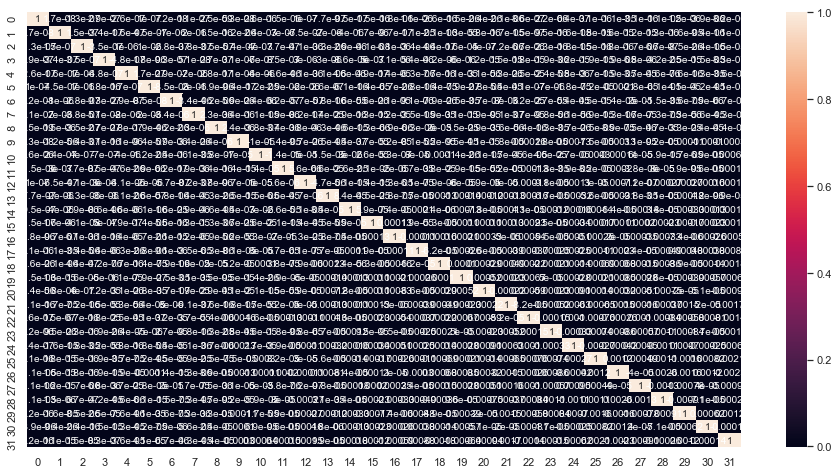

In [185]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (16,8))
sns.heatmap(corrmat,annot = True)
plt.show();

In [186]:
# Convert diagnoal values to zero to and display the max and min values with ranage of 0 ( no correlation)

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.002567955646615441 , min corr:  -0.002345993911144506


#### Step 10.2.7: PCA Analysis :Observe patterns of model using scatter plots

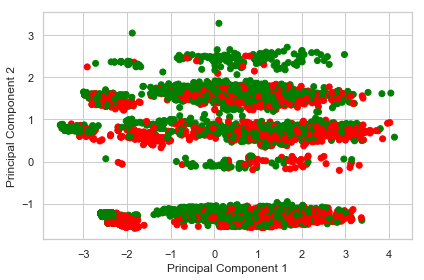

In [187]:
fig = plt.figure(figsize = (6,4))
plt.scatter(final_train_pca[:,0], 
            final_train_pca[:,1], 
            c = y_train1.map({0:'green',1:'red'}))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show();

#### Step 10.2.8: PCA Analysis: Applying the Train Model to Test Dataset 

In [188]:
#Applying selected components to the test data - 16 components
final_test_pca = pca_final.transform(X_test)
final_test_pca.shape

(2480, 32)

#### **Observations**<br>
> - While during PCA `32 components` out of 148 are enough to describe `95%` of the variance in the dataset.
- We will chose these 32 components for our Logistic regression model
- Also, from the correlation matrix, there is no correlation between any 32 compoenents so that, We effectively have removed multicollinearity from our situation, and our models will be much more stable.
- Also, from scatter plot it is clear that classification nice and evenly clustered.
- Since our PCA model looks quite good we apply with confidence on the test data as well
for future predictions.

### Step 10.3 : Logistic Regression on PCA Model

> - We will consider `final_train_pca` model with 32 PC in our train data set for learning the regression model.
> - Also, we will be using the same `final_test_pca` for our test predictions.

### Step 10.3.1: Logistic Regression - Applying Regression on Principal Components

In [189]:
#Training the PCA model on the train dataset

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(final_train_pca,y_train1)

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Step 10.3.2: Logistic Regession - Make Predictions based on Model  

In [190]:
#AUC Score.

y_test_pred_pca = model_pca.predict_proba(final_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test1, y_test_pred_pca))

'0.90'

#### **Observations**<br>
> - We have trained our logistic regression model with reduced of feature of 32 components or significant features.
> - With same model, we predicted on test data set.
> - It is observed the model returns the high probability or AUC score of `0.90` 

In [191]:
pd.options.display.float_format = '{:,.6f}'.format

# Create a data frame of predicted probability values.

y_test_pred_pca = model_pca.predict_proba(final_test_pca)
y_test_pred_pca_df = pd.DataFrame(y_test_pred_pca)

In [192]:
y_test_pred_pca1 = y_test_pred_pca_df.iloc[:,[1]]
y_test_pred_pca1.head()

,1
0,0.071782
1,0.010143
2,0.962962
3,0.079352
4,0.026675


In [193]:
# Obtain y_test1 (original target (`Converted`) in to  dataframe
y_test1_df = pd.DataFrame(y_test1)
y_test1_df.head()

,Converted
2567,0
408,0
5175,1
1912,0
5782,0


In [194]:
# create a new column ID with index values of the target data set 
y_test1_df['ID'] = y_test1_df.index
y_test1_df.shape

(2480, 2)

In [195]:
# Removing index for both dataframes to and merge the predicted and original target dataset

y_test_pred_pca1.reset_index(drop=True, inplace=True)
y_test1_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final_pca = pd.concat([y_test1_df,y_test_pred_pca1],axis=1)

# Renaming the column 
y_pred_final_pca= y_pred_final_pca.rename(columns={ 1 : 'Converted_Prob'})
y_pred_final_pca.head()

,Converted,ID,Converted_Prob
0,0,2567,0.071782
1,0,408,0.010143
2,1,5175,0.962962
3,0,1912,0.079352
4,0,5782,0.026675


In [196]:
# Create new column 'predicted' with 1 if Converted_Prob>0.5 else 0
# we assume 0.5 is the cut off for our PCA Model

y_pred_final_pca['predicted'] = y_pred_final_pca.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

# Let's see the head
y_pred_final_pca.head()

,Converted,ID,Converted_Prob,predicted
0,0,2567,0.071782,0
1,0,408,0.010143,0
2,1,5175,0.962962,1
3,0,1912,0.079352,0
4,0,5782,0.026675,0


In [197]:
y_pred_final_pca.Converted.value_counts()

0    1545
1     935
Name: Converted, dtype: int64

### Step 10.3.3: Logistic Regression - Model  Evaluation  

#### Step 10.3.3.1: Confusion matrix

In [198]:
from sklearn import metrics

In [199]:
# Confusion matrix 
confusion_pca1 = metrics.confusion_matrix( y_pred_final_pca.Converted, y_pred_final_pca.predicted )
confusion_pca1

array([[1259,  286],
       [ 166,  769]])

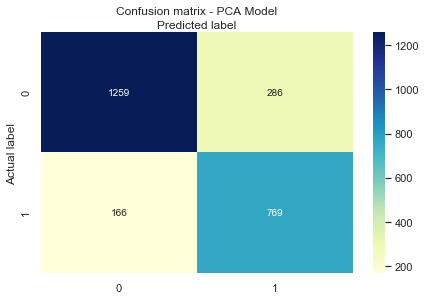

In [200]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_pca1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - PCA Model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [201]:
#Let's check the overall accuracy score, precision score and recall score.

# Accuracy Score
print ("PCA Accuracy Score: ",
        metrics.accuracy_score(y_pred_final_pca.Converted, y_pred_final_pca.predicted))

# Precision Score
print("PCA Precision Score: ",
       metrics.precision_score(y_pred_final_pca.Converted,y_pred_final_pca.predicted))

#Recall Score
print("PCA Recall: ",
       metrics.recall_score(y_pred_final_pca.Converted,y_pred_final_pca.predicted))

PCA Accuracy Score:  0.817741935483871
PCA Precision Score:  0.728909952606635
PCA Recall:  0.8224598930481284


In [202]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show();

    return fpr, tpr, thresholds

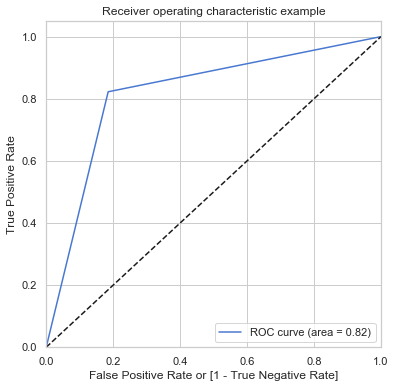

(array([0.        , 0.18511327, 1.        ]),
 array([0.        , 0.82245989, 1.        ]),
 array([2, 1, 0]))

In [203]:
draw_roc(y_pred_final_pca.Converted, y_pred_final_pca.predicted)

#### **Observations**<br>
> - AUC score for the case is `0.90`.  
> - As we can see classification rate or accurate rate is `83%` , it is considered as good accuracy.
> - The precision indicates that `80%` of the time correctly predicts the conversion based on the hot leads.
> - The recall score or rate is of `72%`.
> - Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. The ROC score in our model is `0.81` or around `81%`.

## SUMMARY & CONCLUSION

> - **We have tried the regression model with both RFE (Recursive Feature Elimination) and PCA ( Principal COmponents Model) to find out the accuracy of the accuracy of the Model.**

> - **We have identified the optimum cut-off as `0.35'and the predicted target conversion has been reset for both RFE and PCA Model.**<br>

> - **The statistics obtained from both models (test Statistic) are as below;**
     - **The accuracy score comes out  identical in the both cases;** 
         - ***Accuracy Score using RFE  - `0.81`*** 
         - ***Accuracy Score using PCA  - `0.81`*** <br>  
> - **The precision Score are ;**
     - ***RFE - `0.71`***
     - ***PCA - `0.73`***<br>
     
> - **The Recall Scores are ;**
     - ***RFE - `0.84`***
     - ***PCA - `0.82`***
> - **Also other metrics includes ;**
    - ***Sensitivity - `0.84`***  
    - ***Specificity - `0.80`***
    - ***False Postive Rate - `0.20`***
    - ***Positive Predictive Value - `0.71`***
    - ***Negative Predictive Value - `0.88`***
    